In [ ]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [292]:
!pip install imblearn --upgrade

     |████████████████████████████████| 167 kB 11.0 MB/s eta 0:00:01


In [48]:
!pip install seaborn --upgrade

     |████████████████████████████████| 283 kB 2.8 MB/s eta 0:00:01    |███▌                            | 30 kB 8.4 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


<hr>

## Descargar los conjuntos de datos en formato .csv

In [1]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import collections

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate
from IPython.display import display # display from IPython.display

import itertools
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred, class_names,title="Confusion matrix",normalize=False,onehot = False, size=4):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    if onehot :
        cm = confusion_matrix([y_i.argmax() for y_i in y_true], [y_ip.argmax() for y_ip in y_pred])
    else:
        cm = confusion_matrix(y_true, y_pred)
    figure = plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2) if normalize else cm

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #return figure

In [2]:
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


In [3]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [4]:
df_training_dataset.describe()

,ID,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
count,23999.000000,23731.000000,23355.000000,22698.000000,21275.000000,22728.000000,23714.000000,23524.000000,23429.000000
mean,124.898996,34.495681,6.078484,3.624901,17.291704,17.402719,6.631399,3.157116,10.532204
std,72.305331,7.922939,3.470493,1.939364,17.207016,18.025357,10.835846,6.903053,12.299772
min,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,30.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,125.000000,30.000000,5.000000,3.000000,7.000000,7.000000,1.000000,0.000000,4.000000
75%,188.000000,40.000000,10.000000,6.000000,31.000000,31.000000,15.000000,1.000000,15.000000
max,250.000000,50.000000,15.000000,7.000000,50.000000,50.000000,31.000000,31.000000,35.000000


In [5]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23999 non-null  int64  
 1   Genero                             23110 non-null  object 
 2   Años                               23731 non-null  float64
 3   Estado_civil                       23295 non-null  object 
 4   Trabajo                            21044 non-null  object 
 5   Sector                             23640 non-null  object 
 6   Telefono                           22578 non-null  object 
 7   Anos_usando_internet_banking       23355 non-null  float64
 8   Anos_usando_banca_movil            22698 non-null  float64
 9   Banca_movil_userfriendly           23999 non-null  object 
 10  Frecuencia_internet_banking_mes    21275 non-null  float64
 11  Frecuencia_banca_movil_mes         22728 non-null  flo

* Diversidad de la información

In [6]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

* Balance de la variable objetivo

In [7]:
df_training_dataset['TARGET'].value_counts()

Perfil_5    6215
Perfil_4    6124
Perfil_3    4977
Perfil_2    3762
Perfil_1    2143
Perfil_0     778
Name: TARGET, dtype: int64

* valores nulos

In [8]:
df_training_dataset.isnull().sum()

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64

# EDA

Vamos a observar las variables de forma gráfica para identificar algún dato de interes
* Path
    * Graficar variables numéricas
    * Graficar variables categóricas

# VIsualizando Caracteristicas NUméricas

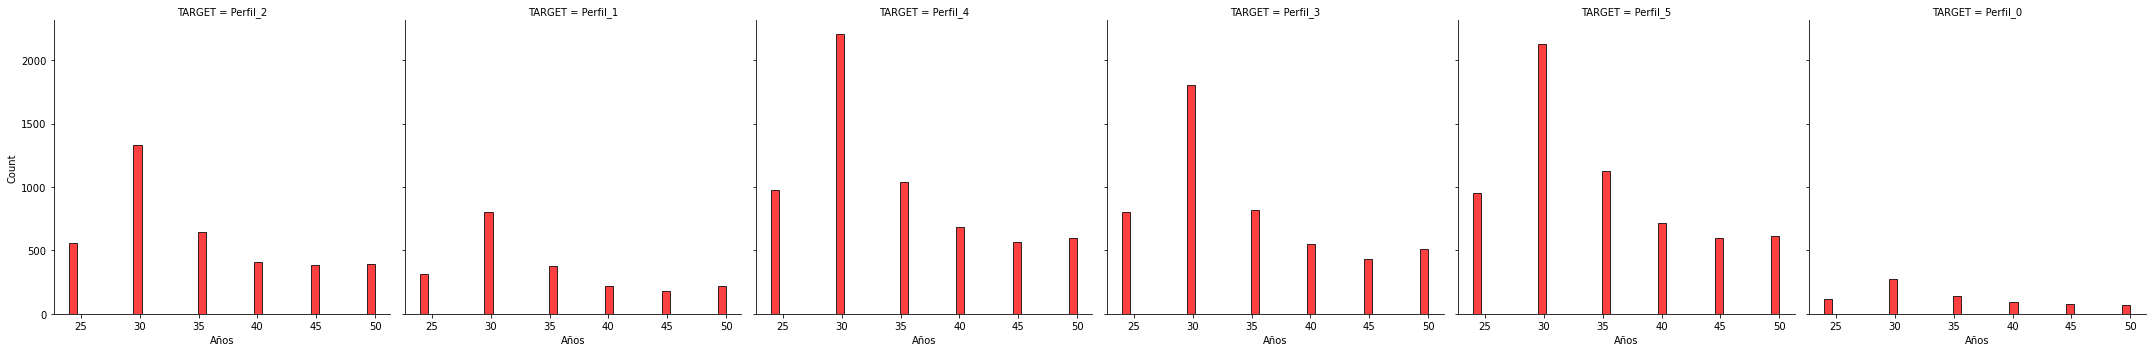

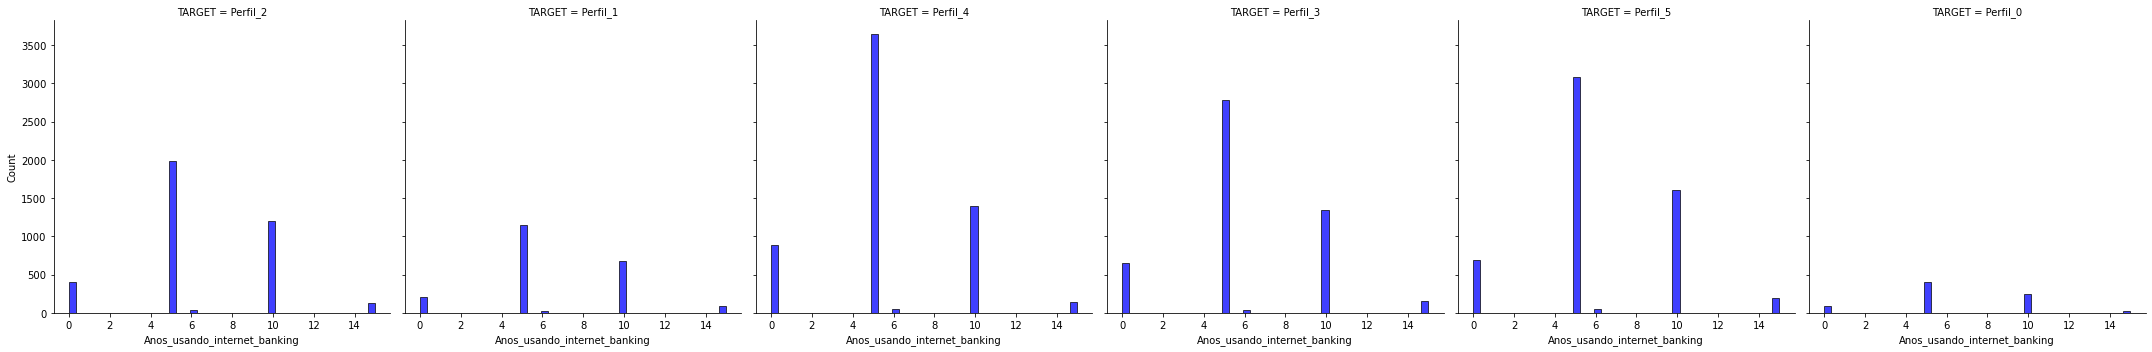

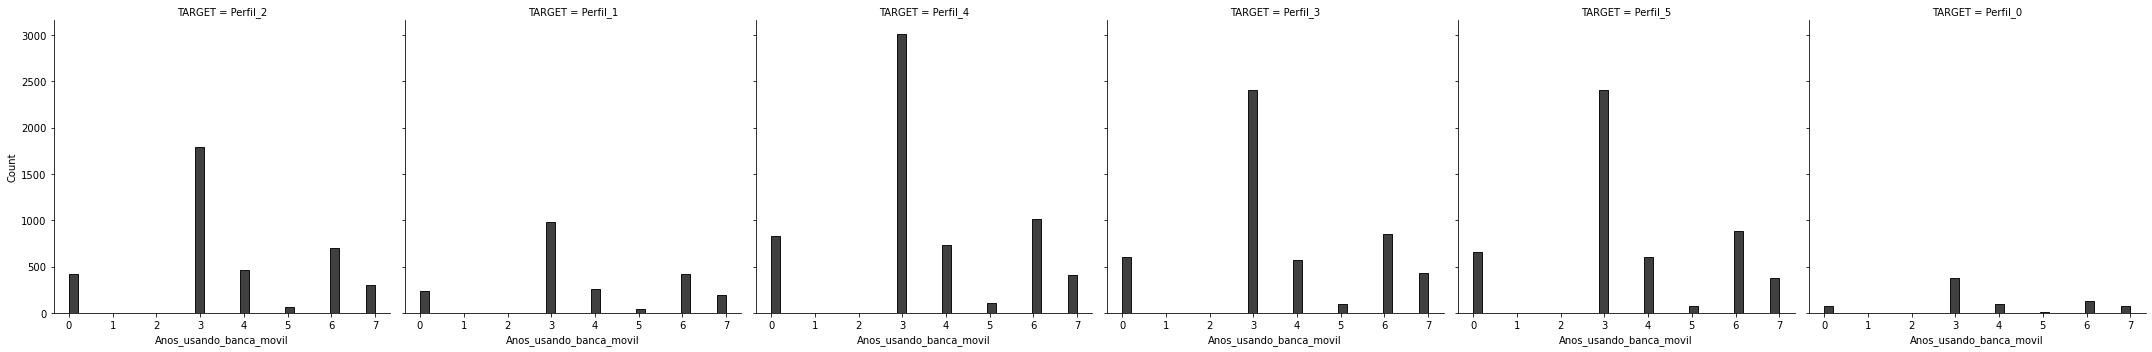

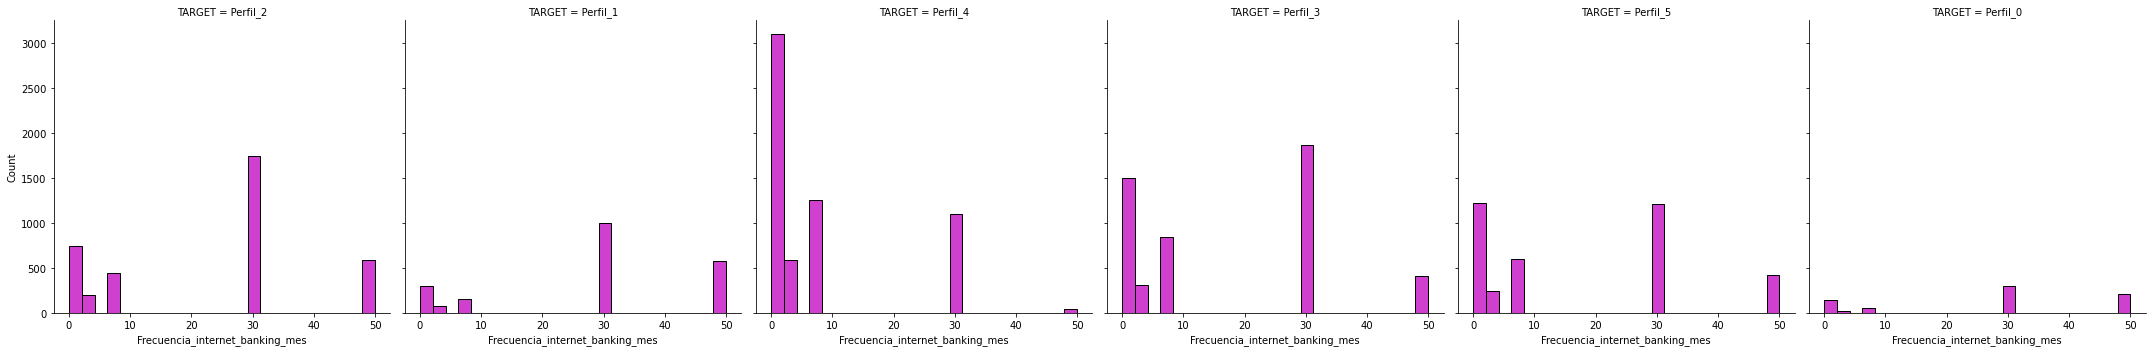

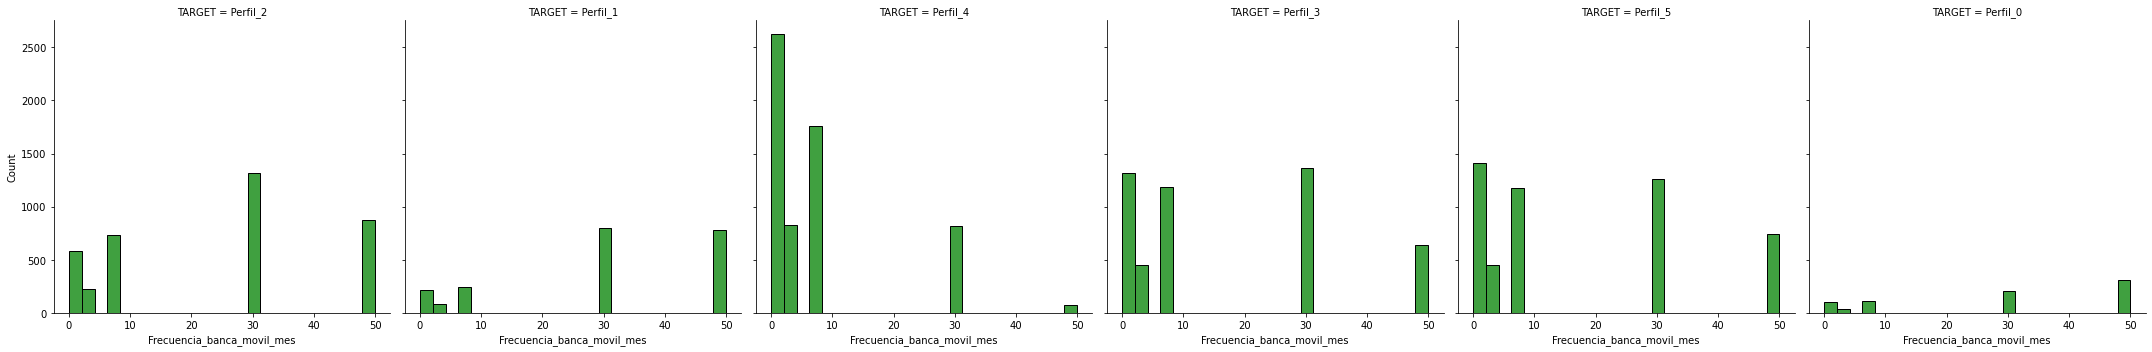

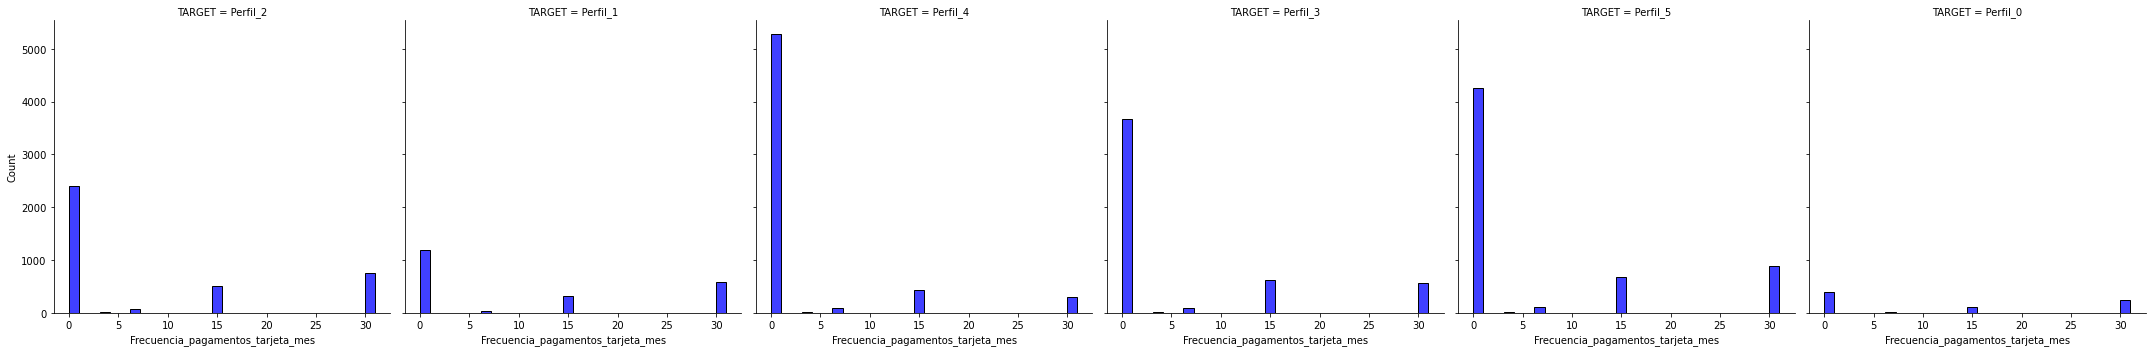

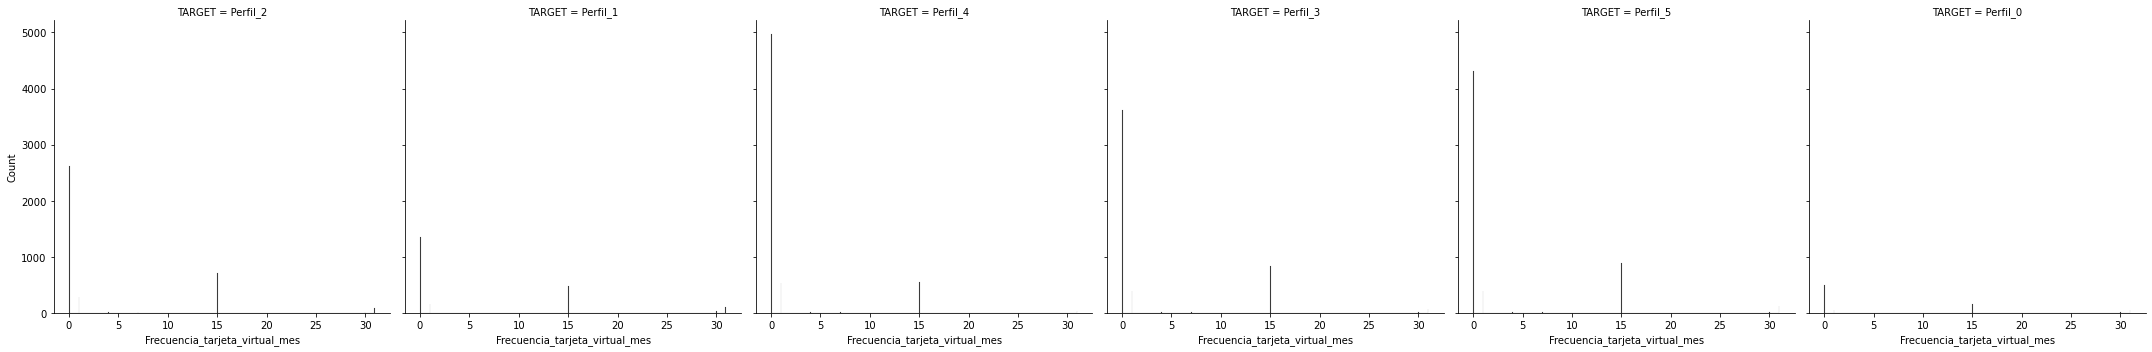

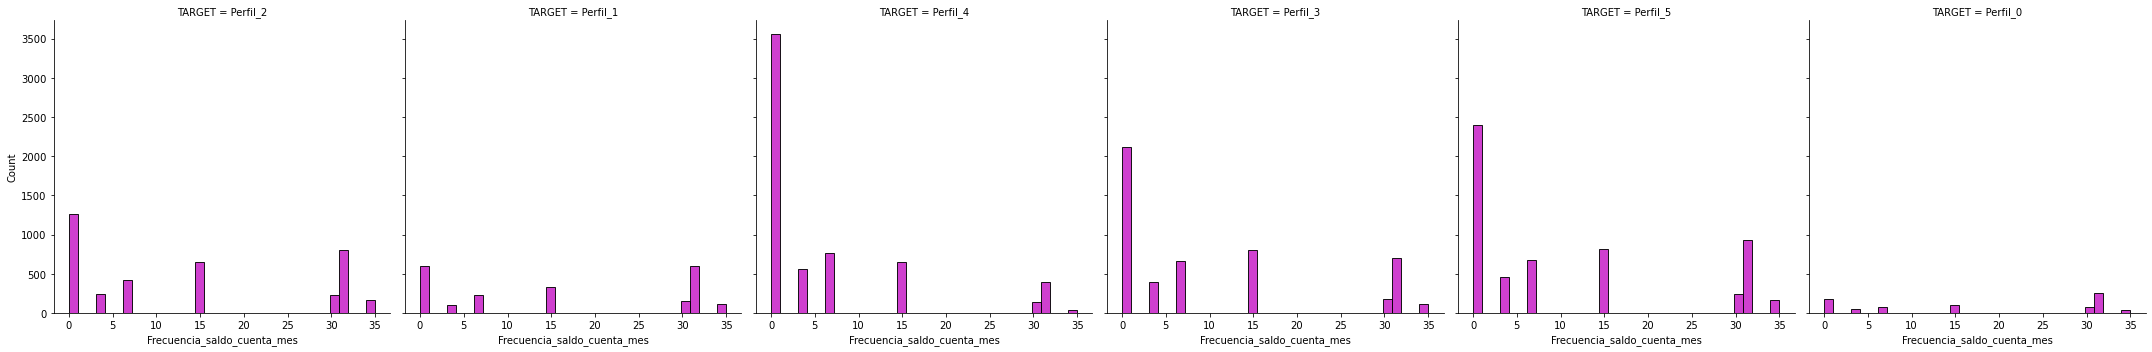

In [9]:
columns_num = df_training_dataset.columns.tolist()
columns_num.remove('TARGET')
columns_num.remove('ID')
#columns.remove('Años')
columns_num.remove('Telefono')
columns_num.remove('Sector')
columns_num.remove('Genero') # Estado_civil  Banca_movil_userfriendly
columns_num.remove('Estado_civil')
columns_num.remove('Trabajo')
columns_num.remove('Banca_movil_userfriendly')

#fig, axes = plt.subplots(nrows=round(len(columns)/3), ncols=3, figsize=(28, 24))
colors = ['r', 'b', 'k', 'm', 'g','b', 'k', 'm', 'g','b', 'k', 'm', 'g']
for column, color in zip(columns_num, colors):
    sns.displot(df_training_dataset, x=column,  col="TARGET", multiple="dodge" ,color=color )# hue="TARGET",
    #sns.displot(df_training_dataset[column], ax=ax )

# Visualizando caracteristicas categoricas

* se observan desvalance en la columna objetivo 'TARGET'
    * El ferfil 0 : tiene una muy baja representación [Upsampling]
* Es necesario reagrupar los varlores de:
    * Telefono
    * Trabajo
* Se observan 92 datos con Genero '0' [evaluar imputar con la moda] [evaluar eliminarlos]
    * Se observa que la representación es mayor en la categoría 5 por loque se puede considerar eliminarlo y no perder información relevante
|   |   |
|-----|-----|
|Perfil_5  |  27|
|Perfil_4 |   22|
|Perfil_3   | 19|
|Perfil_2   | 14|
|Perfil_0   |  5|
|Perfil_1 |    5|

* Training data

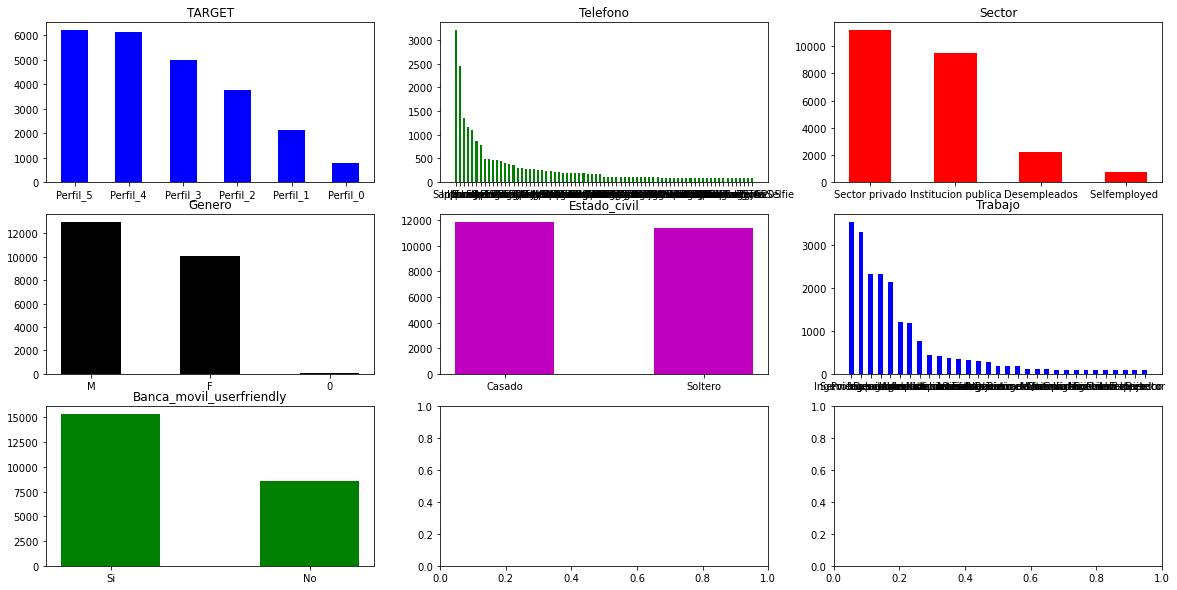

In [10]:
from pylab import rcParams
columns_cat = ['TARGET','Telefono','Sector' ,'Genero','Estado_civil','Trabajo','Banca_movil_userfriendly']

rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=3, ncols=3)
colors = ['b', 'g', 'r', 'k','m','b','g', 'r', 'k','m','b']
for n, zippack in enumerate(zip(axes.flatten(), columns_cat)):
    axhist , i_label = zippack
    axhist.bar(df_training_dataset[i_label].value_counts().index.astype('object'), df_training_dataset[i_label].value_counts(),color=colors[n],width=0.5)
    axhist.set_title(i_label)

* test data

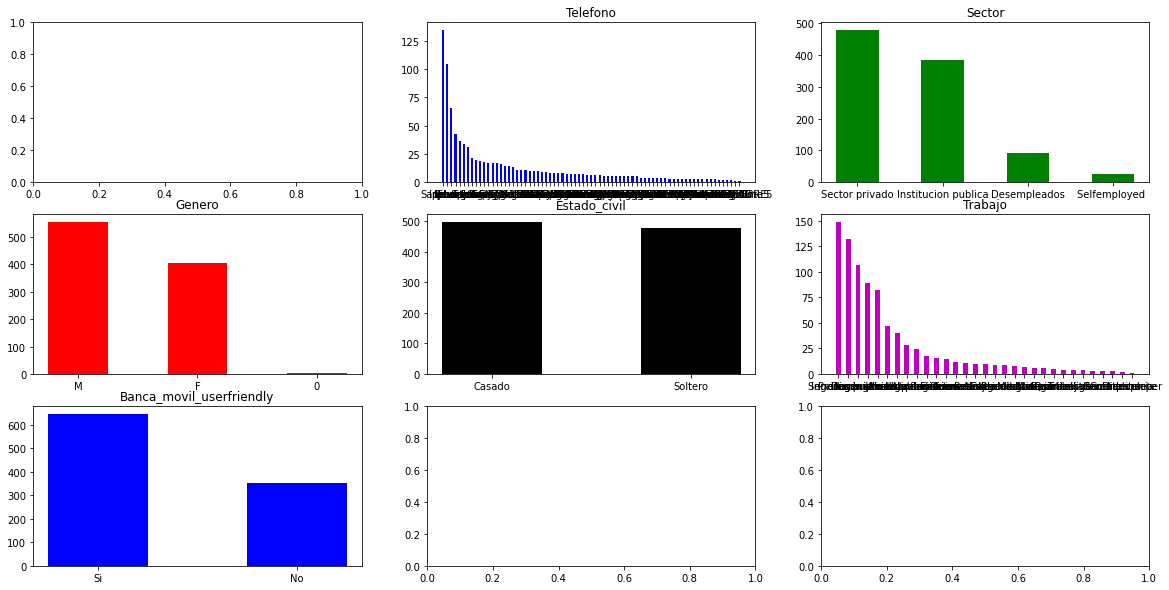

In [11]:
from pylab import rcParams
columns_cat_test = ['Telefono','Sector' ,'Genero','Estado_civil','Trabajo','Banca_movil_userfriendly']

rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=3, ncols=3)
colors = ['b', 'g', 'r', 'k','m','b','g', 'r', 'k','m','b']
for n, zippack in enumerate(zip(axes.flatten()[1:], columns_cat_test)):
    axhist , i_label = zippack
    axhist.bar(df_to_be_scored[i_label].value_counts().index.astype('object'), df_to_be_scored[i_label].value_counts(),color=colors[n],width=0.5)
    axhist.set_title(i_label)

* Datos nulos en la data de testeo

In [12]:
df_to_be_scored.isnull().sum()

ID                                     0
Genero                                37
Años                                  20
Estado_civil                          24
Trabajo                              136
Sector                                17
Telefono                              73
Anos_usando_internet_banking          23
Anos_usando_banca_movil               55
Banca_movil_userfriendly               0
Frecuencia_internet_banking_mes       89
Frecuencia_banca_movil_mes            60
Frecuencia_pagamentos_tarjeta_mes      9
Frecuencia_tarjeta_virtual_mes        23
Frecuencia_saldo_cuenta_mes           27
dtype: int64

## Matrix corr
Trataremos de ver correlaciones entre caracteristicas dentro de cada clase

* Se observan correlaciones en
    * directas para **Perfil_0** e inversa para **Perfil_1, perfil_2 y perfil_3**: 
                Frecuencia banca movil mes         => Frecuencia internet banking mes
                Frecuencia pagamentos targetas mes => frecuencia internet banking mes
                Frecuencia pagamentos targetas mes => frecuencia banca movil mes
                Frecuencia saldo cuenta mes        => frecuencia internet banking mes
                Frecuencia saldo cuenta mes        => frecuencia banca movil mes
* El perfil_5 muestra mucha descorrelación
* El perfil_4 muestra correlaciones inversas en:
    * Frecuencia saldo cuenta mes        => frecuencia internet banking mes
    * Frecuencia saldo cuenta mes        => frecuencia banca movil mes
* Frecuencia tarjeta virtual al mes
    * Perfil_0 => ninguna correlación 
    * Perfil_1 => frecuencia internet banking mes
    * Perfil_2 => frecuencia banca movil mes / frecuencia internet banking mes
    * Perfil_3 => frecuencia banca movil mes / frecuencia internet banking mes
    * Pergil_4 => frecuencia internet banking mes
    * Perfil_5 => ninguna

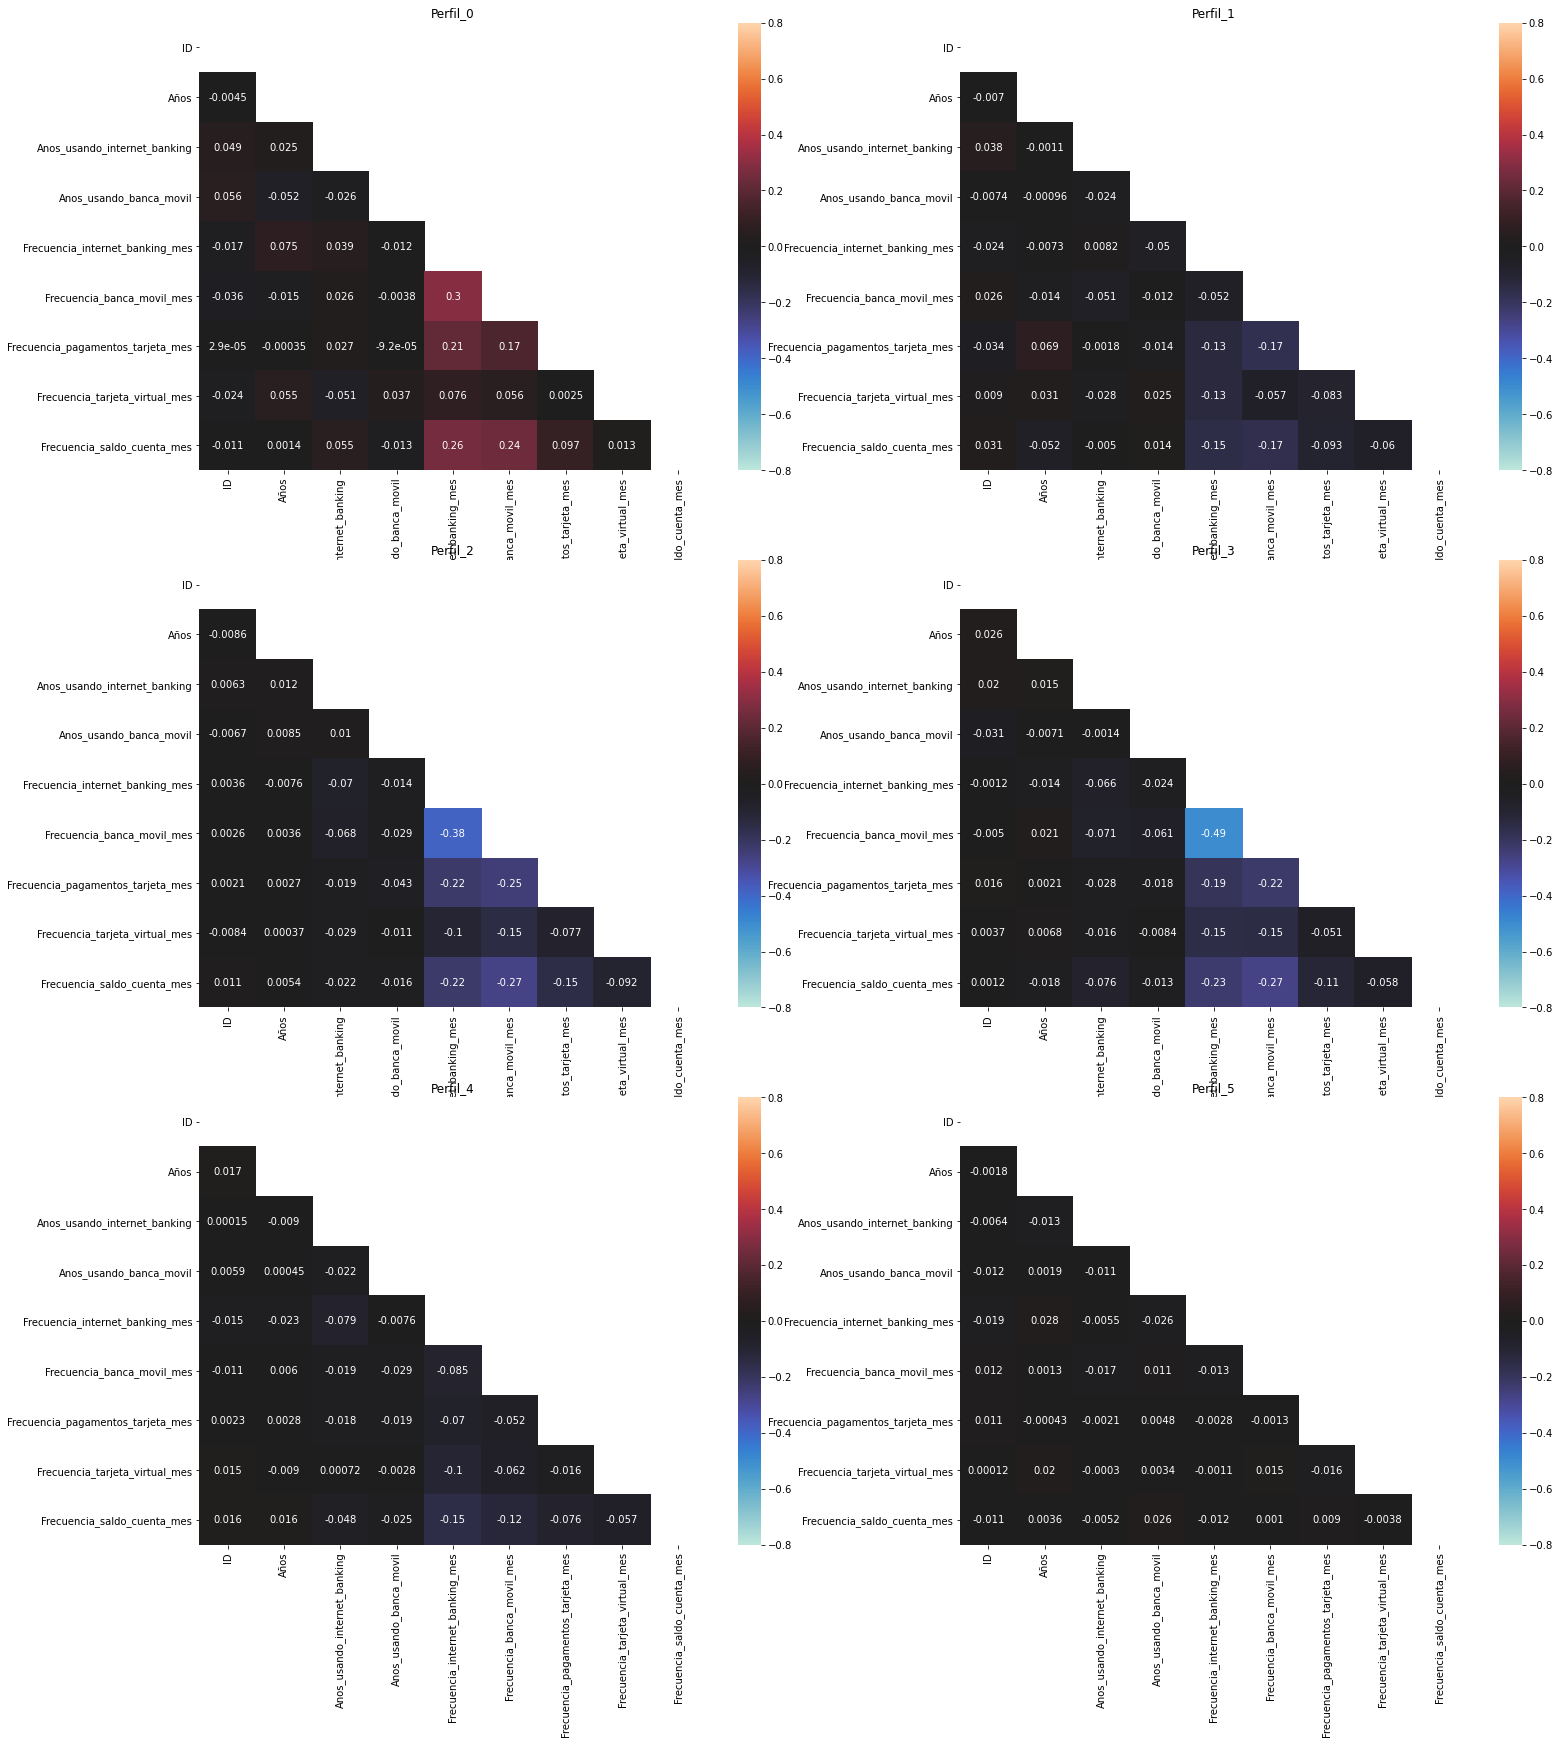

In [13]:
import seaborn as sns
# compute correlation matrix using pandas corr() function
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
# #sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
# corr_df = df_drop.loc[df_drop['TARGET']=='Perfil_2'].corr(method='pearson')  # .loc[df_balanced_improve['PROFILE']=='advanced_backend']
# matrix = np.triu(corr_df)
# hmap=sns.heatmap(corr_df,annot=True, ax=ax, mask=matrix, vmin=-.8,vmax=.8, center=0)

perfiles = ['Perfil_0','Perfil_1','Perfil_2','Perfil_3','Perfil_4','Perfil_5' ]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,28))
colors = ['b', 'g', 'r', 'k','m','b','g', 'r', 'k','m','b']
for n, zippack in enumerate(zip(axes.flatten(), perfiles)):
    ax , i_perfil = zippack
    corr_df = df_training_dataset.loc[df_training_dataset['TARGET']==i_perfil].corr(method='pearson')  # .loc[df_balanced_improve['PROFILE']=='advanced_backend']
    matrix = np.triu(corr_df)
    sns.heatmap(corr_df,annot=True, ax=ax, mask=matrix, vmin=-.8,vmax=.8, center=0)
    ax.set_title(i_perfil)

# Feature Engineering
## Path
* Eliminar valores nulos, según la cantidad de valores nulos que contenga la muestra
* Fill Nan Values
* Reagrupar Telefono --> Android or Iphone
* Reagrupar Trabajo  --> Mas populares
* Arreglar Genero (0) => Tanto en la data de entrenamiento como de Test existe el genero '0' por lo que parece conveniente dejarlo tal como está ||| Despues de tenen multiples fallas se ha decidido colocal a '0' cono NAN para despues ser rellenado
    * Investigar si existe en la data de prueba
    * Probar eliminar
    * Probar imputar con la moda segun [ Estado, telefono, trabajo ]
* Aumentar caracteristicas según sea conveniente, conforme a la matriz de correlación

## Drop null values & Columnas innecesarias
* Eliminaremos muestras que tengan de 2 a más valores nulos. <br>
Por lo que solo quedan datos que poseen un solo valor NULO<br>
Aún despues de eliminar los casos más críticos podemos observar que queda una gran cantidad de datos faltantes
* Se eliminaran las siguientes columnas:
    * ID

In [20]:
display(df_training_dataset.isnull().sum()) #23999.info()

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64

In [25]:
def droprowsNnull( data, n_null=3):
    minNan2drop = n_null
    data['Genero'] = data['Genero'].replace('0', np.nan)
    df_drop = data.dropna(subset=['Frecuencia_internet_banking_mes','Frecuencia_banca_movil_mes','Frecuencia_saldo_cuenta_mes' ], thresh= 3) #len(data.columns)-(minNan2drop-1)
    return df_drop

df_drop = droprowsNnull(data = df_training_dataset)
df_drop = df_drop.drop(columns=['ID'])
df_drop.head()
print('Cantidad de datos: {}'.format(len(df_drop)))
display(df_drop.isnull().sum()) #23999.info() 23589
display(df_drop['TARGET'].value_counts())

Cantidad de datos: 19660


Genero                                812
Años                                  208
Estado_civil                          572
Trabajo                              2388
Sector                                292
Telefono                             1144
Anos_usando_internet_banking          502
Anos_usando_banca_movil              1063
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes         0
Frecuencia_banca_movil_mes              0
Frecuencia_pagamentos_tarjeta_mes     231
Frecuencia_tarjeta_virtual_mes        385
Frecuencia_saldo_cuenta_mes             0
TARGET                                  0
dtype: int64

Perfil_4    6037
Perfil_3    4908
Perfil_2    3699
Perfil_5    2225
Perfil_1    2077
Perfil_0     714
Name: TARGET, dtype: int64

## Filling NAN values
Se observa un gran cantidad de valores nulos en cada fila, tanto en categóricos como numéricos<br>
**Hechos:** Los valores nulos existen tanto en el entrenamiento como en las pruebas, por lo que las tecnicas de rellenado deben ser las mismas o equivalentes
* Agrupar las variables categóricas
* Rellenar los nan values

### Datos de Entrenamiento:
* Eliminar todos los valores nulos almacenarlo en una tabla auxiliar
* **Rellenar Genero**
    * Agrupar según perfil
        * Agrupar según sector, estado civil y trabajo => tomar la moda del genero en cada caso
* **Rellenar Estado Civil**
    * Agrupar según perfil
        * Agrupar según sector, trabajo y genero=> tomar la moda del estado civil en cada caso
* **Rellenar Trabajo**
    * Agrupar según perfil
        * Agrupar según sector, estado civil y genero=> tomar la moda del Trabajo en cada caso
* **Rellenar Telefono**
    * Agrupar según perfil
        * Agrupar según sector, trabajo y genero=> tomar la moda del Telefono en cada caso
* **Rellenar Sector**
    * Agrupar según perfil
        * Agrupar según trabajo y genero=> tomar la moda del sector en cada caso      
        
* **Rellenar Años**
    * Agrupar según perfil
        * Agrupar según GENERO, TRABAJO, SECTOR, ESTADO CIVIL => tomar la MEDIA del sector en cada caso              

## Creando la tabla sin nulos : auxi

In [29]:
df_temp_aux =df_drop.dropna()# droprowsNnull(data = df_drop, n_null=1) # elimina los datos que al menos tengan 1 valor nulo
df_temp_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13189 entries, 0 to 23998
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Genero                             13189 non-null  object 
 1   Años                               13189 non-null  float64
 2   Estado_civil                       13189 non-null  object 
 3   Trabajo                            13189 non-null  object 
 4   Sector                             13189 non-null  object 
 5   Telefono                           13189 non-null  object 
 6   Anos_usando_internet_banking       13189 non-null  float64
 7   Anos_usando_banca_movil            13189 non-null  float64
 8   Banca_movil_userfriendly           13189 non-null  object 
 9   Frecuencia_internet_banking_mes    13189 non-null  float64
 10  Frecuencia_banca_movil_mes         13189 non-null  float64
 11  Frecuencia_pagamentos_tarjeta_mes  13189 non-null  flo

## Creando Metodo para llenar todos los nulos de las caracteristica categóricas
* Agrupar segun ['Genero','Estado_civil','Trabajo'] e ir tomando la moda de cada una de ellas para despues llenarla en cada columna ['Genero','Estado_civil','Sector', 'Trabajo', 'Telefono', 'Años'] de forma iterativa

In [30]:
from tqdm import tqdm
def fill_values(data, aux_table, columns2fill, columnsBase, target_column=None):
    """ columns2fill no contiene la etiqueta targe """
    columnsBase.append(target_column) if target_column else None
    data['Genero'] = data['Genero'].replace('0', np.nan)
    
    def fill_na_val(x,mode_values, base_table,base_table_ex,column,target_column,columnBase_i,columnBase_i_group,columnBase_i_group_ex):
        if x[column] == x[column]: ## solo deben entrar los valores nulos
            return x[column] 
        valores2look = [x[col_name] if x[col_name] == x[col_name] else mode_values[col_name][0]  for col_name in columnBase_i_group]
        valores2look = tuple(valores2look)
        try:
            valuefix = base_table.loc[valores2look][0]
            
        except:
            #print(valores2look)
            #print(valores2look)
            #base_table   = aux_table[columnBase_i].groupby(columnBase_i_group).agg(lambda x:x.value_counts().index[0])
            valores2look = tuple([x[col_name] for col_name in columnBase_i_group_ex])
            valuefix = base_table_ex.loc[valores2look][0]
            #print('Se Alternó')
            pass
        return valuefix
    
    for column in tqdm(columns2fill):
        #print(columnsBase)
        columnBase_i       = columnsBase.copy()
        columnBase_i_group = columnsBase.copy()
        if not column in columnsBase:
            columnBase_i.append(column)
        else: 
            columnBase_i_group.remove(column)
        base_table   = aux_table[columnBase_i].groupby(columnBase_i_group).agg(lambda x:x.value_counts().index[0])
        
        columnBase_i_ex = columnBase_i.copy()
        columnBase_i_ex.remove(target_column) if target_column else None
        columnBase_i_group_ex = columnBase_i_group.copy()
        columnBase_i_group_ex.remove(target_column) if target_column else None
        mode_values = aux_table[columns2fill].mode()
        base_table_ex   = aux_table[columnBase_i_ex].groupby(columnBase_i_group_ex).agg(lambda x:x.value_counts().index[0])
        
        data[column] = data.apply(fill_na_val,args=(mode_values, base_table,base_table_ex,column,target_column,columnBase_i,columnBase_i_group,columnBase_i_group_ex ), axis=1)
    return data.copy()

## Train Data : Imputando nan valores Categóricos

In [31]:
columns2fill_ = ['Genero','Estado_civil','Sector', 'Trabajo', 'Telefono', 'Años']
columnsBase__ = ['Genero','Estado_civil','Trabajo']
df_train_fill_cat = fill_values(data = df_drop.copy(),aux_table=df_temp_aux.copy() , columns2fill = columns2fill_, columnsBase = columnsBase__ , target_column='TARGET'  )
df_train_fill_cat = df_train_fill_cat.reset_index(drop=True)
df_train_fill_cat.info() #('Soltero', 'Selfemployed', 'adquisitivo', 'Perfil_4')  ('Soltero', 'Selfemployed', 'adquisitivo', 'Perfil_4')

100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19660 entries, 0 to 19659
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Genero                             19660 non-null  object 
 1   Años                               19660 non-null  float64
 2   Estado_civil                       19660 non-null  object 
 3   Trabajo                            19660 non-null  object 
 4   Sector                             19660 non-null  object 
 5   Telefono                           19660 non-null  object 
 6   Anos_usando_internet_banking       19158 non-null  float64
 7   Anos_usando_banca_movil            18597 non-null  float64
 8   Banca_movil_userfriendly           19660 non-null  object 
 9   Frecuencia_internet_banking_mes    19660 non-null  float64
 10  Frecuencia_banca_movil_mes         19660 non-null  float64
 11  Frecuencia_pagamentos_tarjeta_mes  19429 non-null  flo

## Test Data: Imputando nan valores Categóricos

In [32]:
columns2fill_ = ['Genero','Estado_civil','Sector', 'Trabajo', 'Telefono', 'Años']
columnsBase__ = ['Genero','Estado_civil','Trabajo']
df_test_fill_cat = fill_values(data = df_to_be_scored.copy(), aux_table=df_temp_aux.copy() , columns2fill = columns2fill_, columnsBase = columnsBase__  )
df_test_fill_cat.info()

100%|██████████| 6/6 [00:00<00:00,  7.39it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1000 non-null   int64  
 1   Genero                             1000 non-null   object 
 2   Años                               1000 non-null   float64
 3   Estado_civil                       1000 non-null   object 
 4   Trabajo                            1000 non-null   object 
 5   Sector                             1000 non-null   object 
 6   Telefono                           1000 non-null   object 
 7   Anos_usando_internet_banking       977 non-null    float64
 8   Anos_usando_banca_movil            945 non-null    float64
 9   Banca_movil_userfriendly           1000 non-null   object 
 10  Frecuencia_internet_banking_mes    911 non-null    float64
 11  Frecuencia_banca_movil_mes         940 non-null    float6

## Train Data: Imputando Caracteristicas numéricas

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import  BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputers = {'itera':IterativeImputer(sample_posterior=False,random_state=15,
                                     imputation_order='ascending',n_nearest_features=None,initial_strategy='most_frequent',max_iter=10),
                'knn': KNNImputer(n_neighbors=10, weights='distance')}
imp_name = 'knn'

#columns_num
columns_num = ['Años',
             'Anos_usando_internet_banking',
             'Anos_usando_banca_movil',
             'Frecuencia_internet_banking_mes',
             'Frecuencia_banca_movil_mes',
             'Frecuencia_pagamentos_tarjeta_mes',
             'Frecuencia_tarjeta_virtual_mes',
             'Frecuencia_saldo_cuenta_mes']
df_train = df_train_fill_cat.copy()
classes = df_train_fill_cat['TARGET'].unique()
classes = classes.tolist()
columns = df_train_fill_cat.columns.tolist()
df_train_filled = pd.DataFrame(columns=columns) #np.zeros(shape=(len(df_train_fill_cat),len(columns_num))) #columns_num

for class_i in  classes:
    feature_class = None
    train_imputer = imputers[imp_name]
    feature_class = df_train.loc[df_train['TARGET']==class_i ].copy()#.drop(columns=['TARGET'])
    train_imputer.fit(feature_class[columns_num])
    feature_class.loc[:,columns_num] = train_imputer.transform(feature_class[columns_num])
    df_train_filled = pd.concat([df_train_filled,feature_class])
#df_train[columns_num] = df_healthy_num
#df_train.sort_index(inplace=True)

##################################### Creando KNN_imputer para las muestras de Testeo ####################
test_imputer =  imputers[imp_name]
test_imputer.fit(df_train_filled[columns_num])
########
display(df_train_filled.head())
display(df_train_filled.info())

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
0,M,30.0,Casado,Profesor,Institucion publica,Samsung,0.0,6.0,Si,50.0,0.0,1.0,0.0,30.0,Perfil_2
11,M,35.0,Soltero,Desempleados,Institucion publica,SAMSUNG A5,10.0,5.0,Si,31.0,31.0,0.0,0.0,1.0,Perfil_2
13,M,35.0,Soltero,Ingenieria en computacion,Sector privado,Iphone 5S,5.0,4.0,No,31.0,7.0,31.0,0.0,0.0,Perfil_2
15,M,30.0,Casado,Analista de informacion,Sector privado,Samsung S3,10.0,3.0,No,31.0,50.0,0.0,1.0,1.0,Perfil_2
18,F,40.0,Soltero,Ingenieria en computacion,Institucion publica,LG G3,5.0,3.0,Si,31.0,7.0,15.0,0.0,30.0,Perfil_2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 19659
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Genero                             19660 non-null  object 
 1   Años                               19660 non-null  float64
 2   Estado_civil                       19660 non-null  object 
 3   Trabajo                            19660 non-null  object 
 4   Sector                             19660 non-null  object 
 5   Telefono                           19660 non-null  object 
 6   Anos_usando_internet_banking       19660 non-null  float64
 7   Anos_usando_banca_movil            19660 non-null  float64
 8   Banca_movil_userfriendly           19660 non-null  object 
 9   Frecuencia_internet_banking_mes    19660 non-null  float64
 10  Frecuencia_banca_movil_mes         19660 non-null  float64
 11  Frecuencia_pagamentos_tarjeta_mes  19660 non-null  flo

None

## Test Data: Imputando Caracteristicas numéricas

In [35]:
df_test_filled = df_test_fill_cat.copy()
df_test_filled.loc[:,columns_num] = test_imputer.transform(df_test_filled[columns_num])
display(df_test_filled.head())
display(df_test_filled.info())

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
0,42,F,45.0,Casado,Ingenieria en computacion,Institucion publica,Iphone,10.0,3.0,Si,31.0,7.0,0.0,0.0,31.0
1,112,F,30.0,Soltero,Ingenieria en computacion,Institucion publica,Nokia,10.0,3.0,Si,0.0,7.0,1.0,0.0,0.0
2,212,M,45.0,Casado,Desempleados,Sector privado,Iphone 6,10.0,6.0,Si,1.0,1.0,15.0,0.0,4.0
3,156,F,30.0,Casado,Ingenieria en computacion,Sector privado,General Mobile,10.0,6.0,No,16.0,50.0,15.0,0.0,0.0
4,228,F,24.0,Casado,Servidor publico,Sector privado,Smartphone,5.0,6.0,Si,4.0,7.0,0.0,0.0,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1000 non-null   int64  
 1   Genero                             1000 non-null   object 
 2   Años                               1000 non-null   float64
 3   Estado_civil                       1000 non-null   object 
 4   Trabajo                            1000 non-null   object 
 5   Sector                             1000 non-null   object 
 6   Telefono                           1000 non-null   object 
 7   Anos_usando_internet_banking       1000 non-null   float64
 8   Anos_usando_banca_movil            1000 non-null   float64
 9   Banca_movil_userfriendly           1000 non-null   object 
 10  Frecuencia_internet_banking_mes    1000 non-null   float64
 11  Frecuencia_banca_movil_mes         1000 non-null   float6

None

## REJECTED: Corrigiendo(Discretizando) todas las caractetisticas discretas originalmente
** NO MEJORA LA CLASIFICACIÓN, POR EL CONTRARIO LA EMPEORA**

Se observa en la data original que solo existen unos cuantos valores alrededor de 6-7 valores únicos por columna por lo que se propone reagrupar todos los valores
float obtenidos despues de la imputación con KNN, asignando el valor discreto (de la tabla original) más cercano a los actuales valores.
* Encontrar valores discretos unicos en cada columna numerica
* Asignar el valor discreto en función a su cercanía

### Train Data & Test Data

## Visualizando los datos rellenados

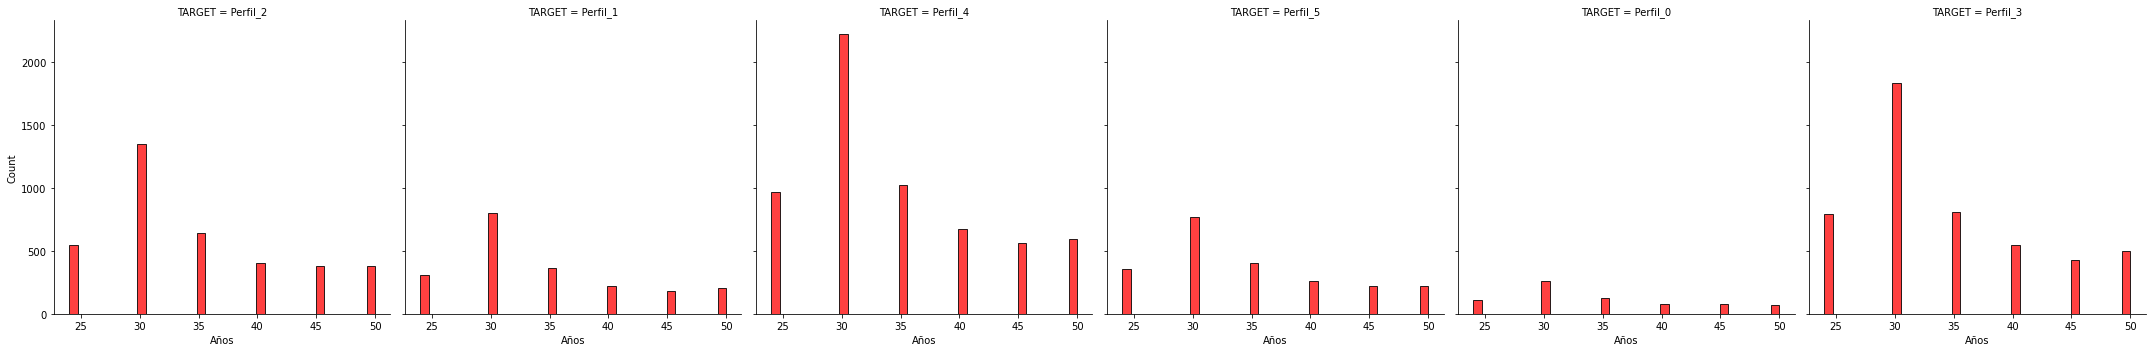

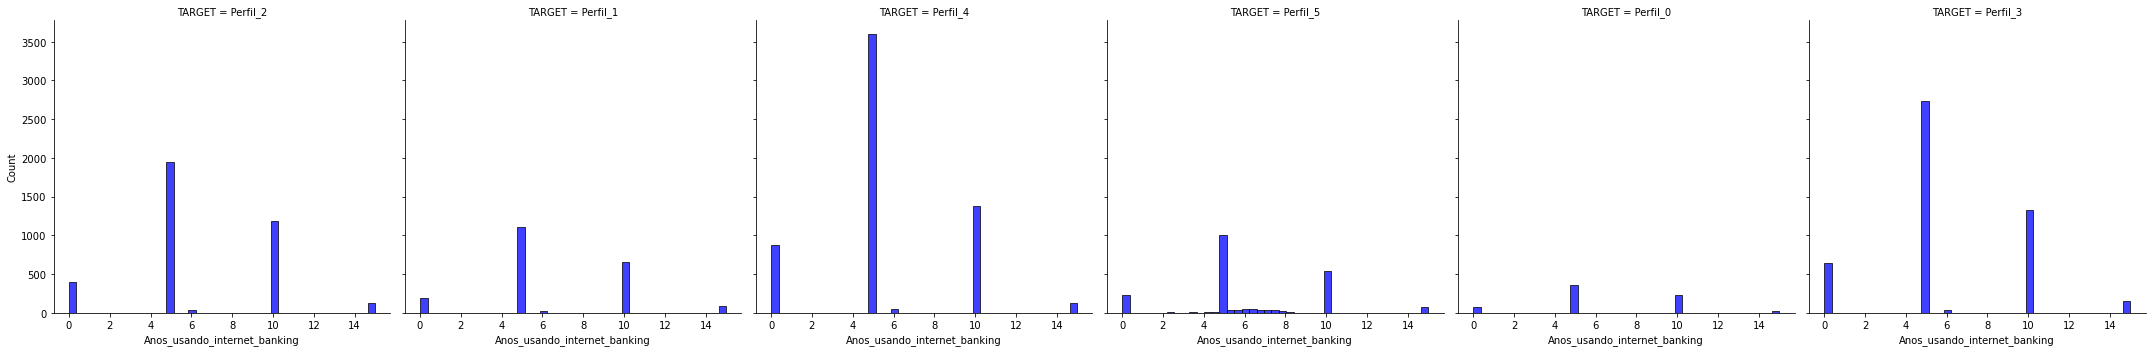

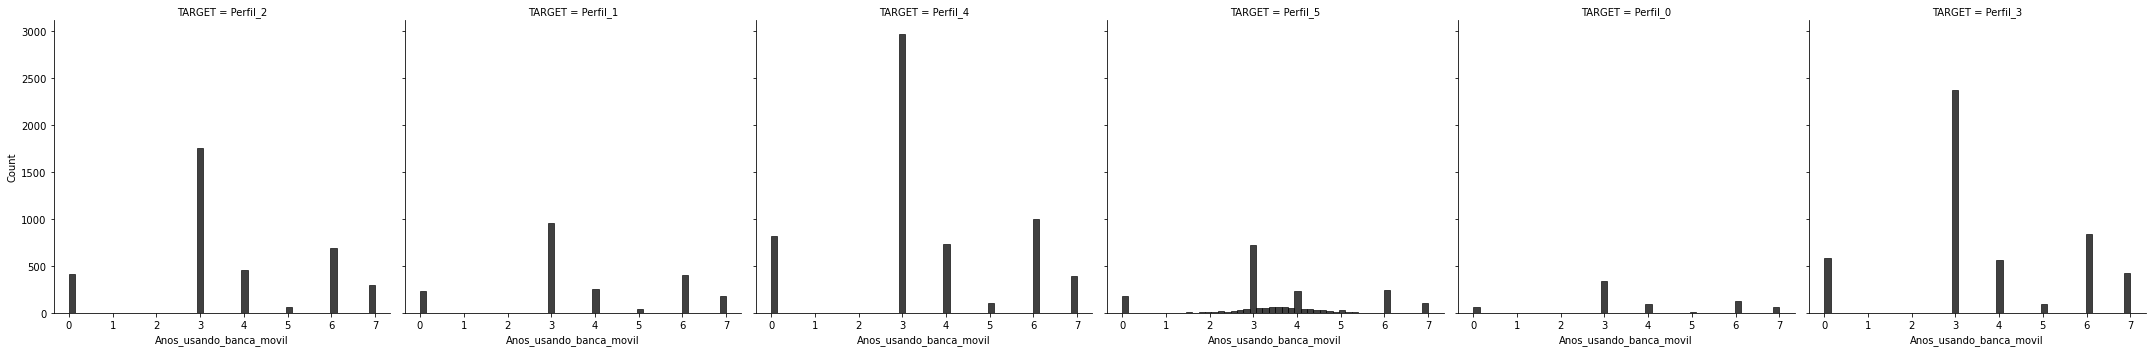

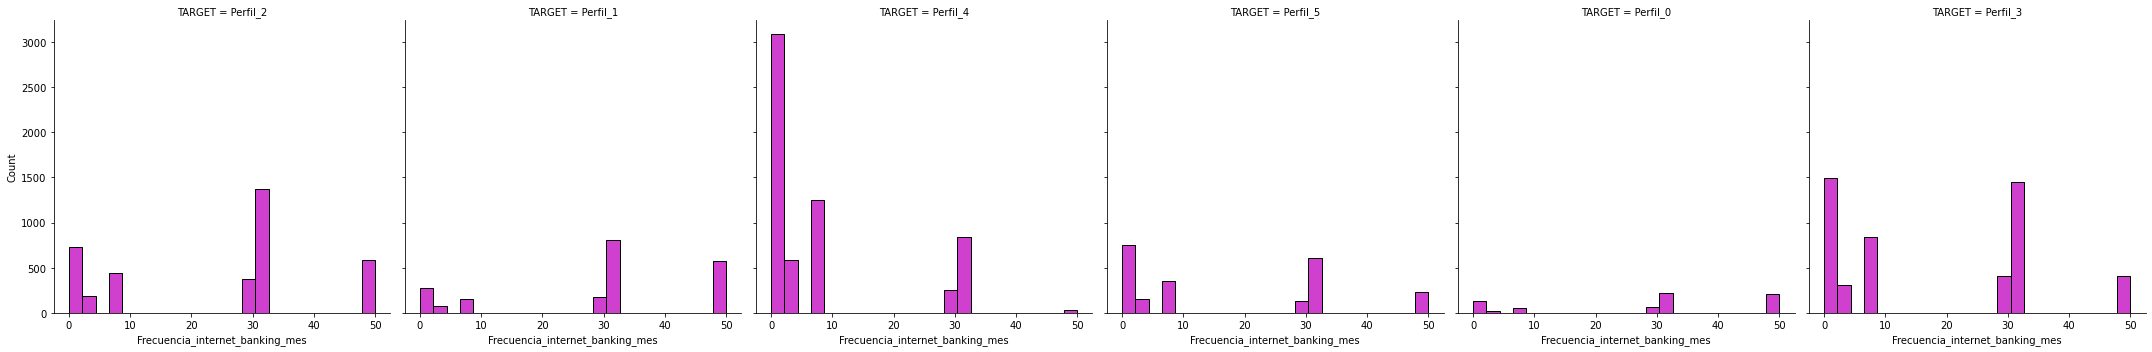

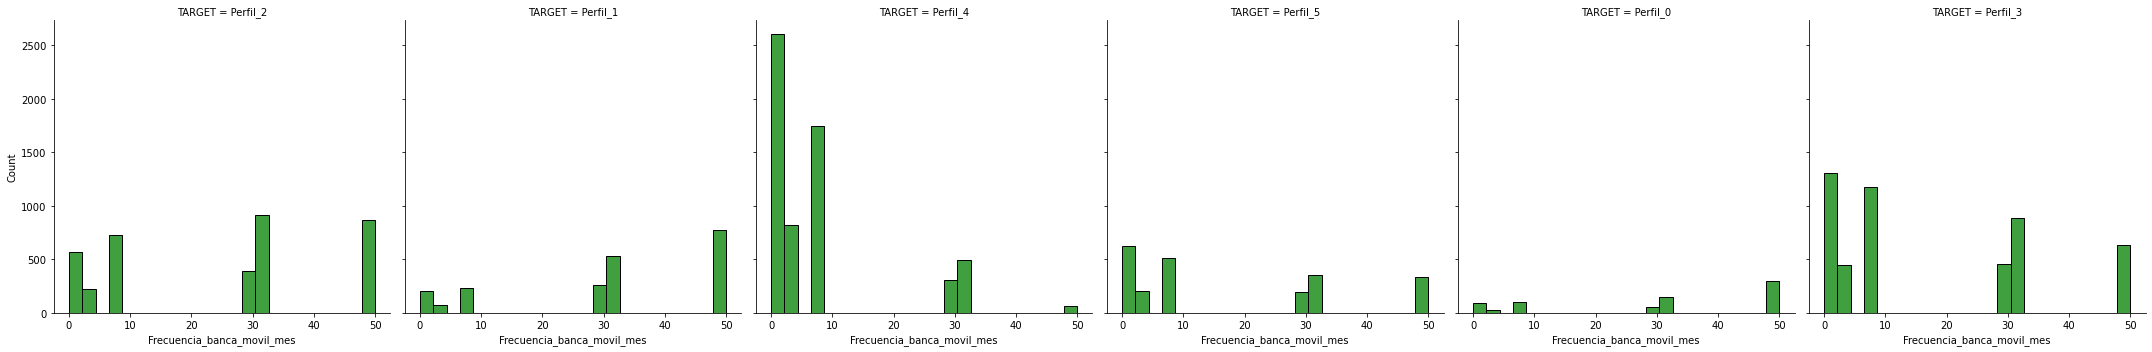

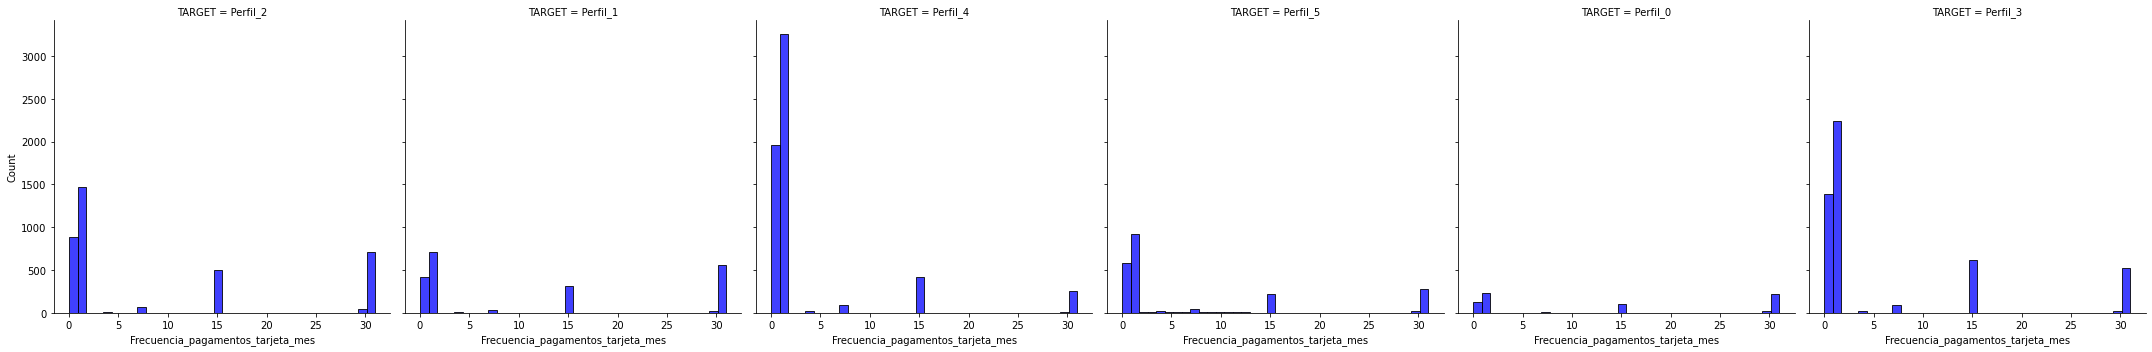

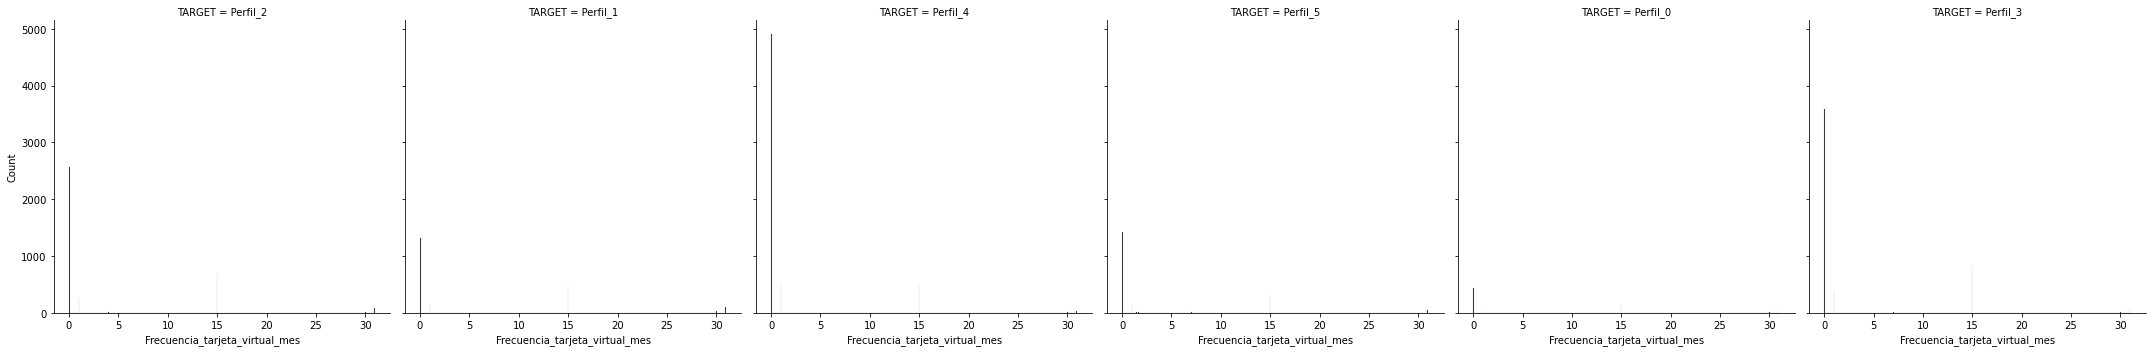

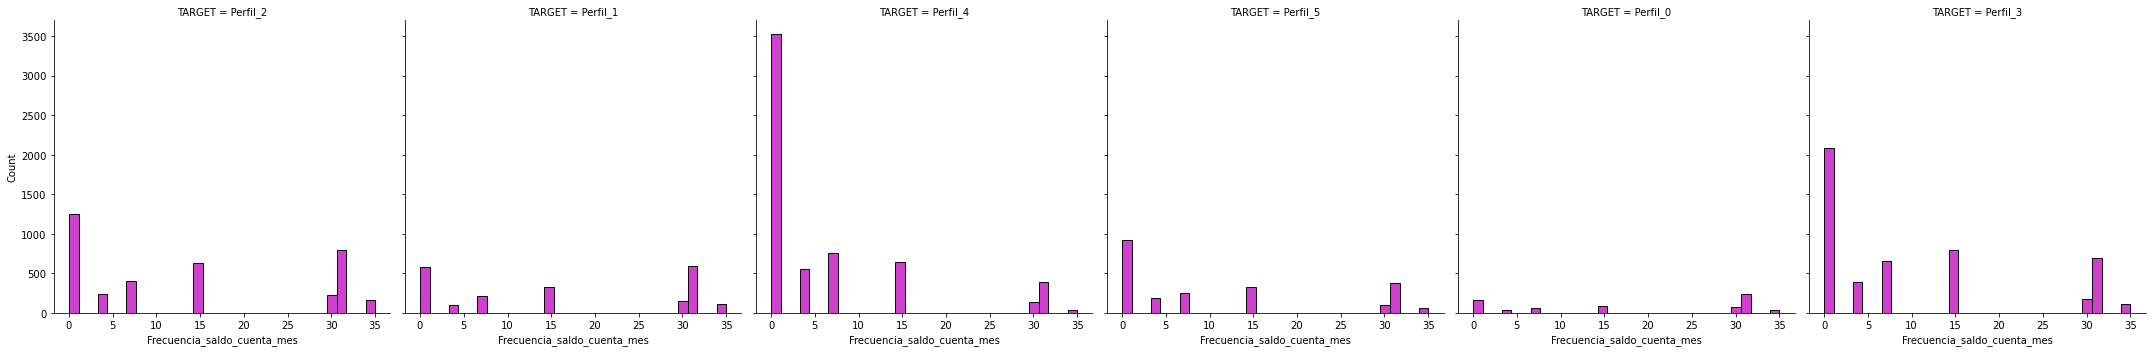

In [36]:
#fig, axes = plt.subplots(nrows=round(len(columns)/3), ncols=3, figsize=(28, 24))
colors = ['r', 'b', 'k', 'm', 'g','b', 'k', 'm', 'g','b', 'k', 'm', 'g']
for column, color in zip(columns_num, colors):
    sns.displot(df_train_filled, x=column,  col="TARGET", multiple="dodge" ,color=color )# hue="TARGET",
    #sns.displot(df_training_dataset[column], ax=ax )

## Reagrupar Telefono y Trabajo
### Telefono
Agruparemos los teléfonos en los 2 moviles más populares, el resto lo dejaremos en otros
* iphone
* samsung
* Otros

### Trabajo
Investigar que trabajos hay por cada sector
Agrupar todas 
   * las ingenierias en una sola categoría - inges =  [ ingenieria, minero , analistadeinformacion ,  businessintelligencedeveloper  ]
   * Agrupas sector salud = [ enfermera , medico, psicologo ]
   * agrupar ciencias  = [matematico, quimico ]
   * Mantener [ profesor,servidorpublico,alumno,retirado,gerente,contador,desempleados  ]
   * Todos los demas en 'otros'

In [37]:
def regroup_phone_work(data):
    ## Telefono
    temp = data['Telefono'].astype(str).apply(lambda x: x.split(' ')[0].replace('.', '').replace('/','').lower() if not x.split(' ')[0].isnumeric() else 'other') #  .value_counts()
    group_phones = ['iphone', 'samsung', 'galaxy']
    data.loc[:,['Telefono']] = temp.apply(lambda x: 'others' if not x in group_phones else x ).apply(lambda x: 'samsung' if x == 'galaxy' else x )
    
    ## Trabajo
    inge = [ 'ingenieria', 'minero' , 'analistadeinformacion' , 'businessintelligencedeveloper' ]
    salud = [ 'enfermera' , 'medico', 'psicologo' ]
    ciencias = ['matematico', 'quimico' ]
    mantener = [ 'profesor','servidorpublico','alumno','retirado','gerente','contador','desempleados', 'ingenieria','salud','ciencia' ]

    temp_trab = data['Trabajo'].astype(str).apply(lambda x: 'ingenieria' if 'inge' in x.split(' ')[0].replace('.', '').lower() else x.replace(' ', '').lower()) #  .value_counts()
    temp_trab = temp_trab.apply( lambda x: 'ingenieria' if x in inge else x  )
    temp_trab = temp_trab.apply( lambda x: 'salud' if x in salud else x  )
    temp_trab = temp_trab.apply( lambda x: 'ciencia' if x in ciencias else x  )
    data.loc[:,['Trabajo']]  = temp_trab.apply( lambda x: x if x in mantener else 'others'  )
    
    return data

### Train Data - regroup

In [38]:
df_train_g = regroup_phone_work(df_train_filled)
display(df_train_g['Telefono'].value_counts())
display(df_train_g['Trabajo'].value_counts())

iphone     6985
samsung    6394
others     6281
Name: Telefono, dtype: int64

ingenieria         6600
profesor           4583
servidorpublico    3400
desempleados       1721
others             1395
alumno              998
salud               476
ciencia             179
retirado            157
contador             78
gerente              73
Name: Trabajo, dtype: int64

### Test Data - regroup

In [39]:
df_test_g = regroup_phone_work(df_test_filled)
display(df_test_g['Telefono'].value_counts())
display(df_test_g['Trabajo'].value_counts())

samsung    359
iphone     351
others     290
Name: Telefono, dtype: int64

ingenieria         322
profesor           285
servidorpublico    132
desempleados        89
others              66
alumno              47
salud               32
ciencia             11
retirado            10
contador             3
gerente              3
Name: Trabajo, dtype: int64

## Features augmentation
Podemos observar que la columna *Frecuencia_banca_movil_mes* y *Frecuencia_internet_banking_mes* están muy correlacionados, según las gráficas arriva mostradas
* Podemos unirlas usando un agregado llamado **Freacuencia_banca_digital** = *Frecuencia_banca_movil_mes* + *Frecuencia_internet_banking_mes*
* Notamos que existen dos tipos de caracteristicas, que podemos fusionar como Uso Absoluto = **Años** * **Frecuencia**
    * Años de uso
    * Frecuencia de uso
* Teniendo los usos totales podemos obtener
    * Tiempo absoluto online = **Uso abs - internet banking** + **uso abs - movil**
    
* Podemos obtener un ratio sobre el uso de la trajeta
    * Razón:  Frecuencia tarjeta virtual mes / x['Frecuencia_pagamentos_tarjeta_mes']+x['Frecuencia_tarjeta_virtual_mes'] mes ==> Cada cuantas usadas de tarjeta se utilizan para realizar pagamentos
    
* Podemos obtener el ratio de paridad o disparidad con respecto al uso de las plataformas electrónica
    * Razón: Frecuencia_banca_movil_mes / [Frecuencia_internet_banking_mes + Frecuencia_banca_movil_mes]
    
* Podemos obtener la razón con la que alguien revisa su saldo usando la plataorma virtual en general
    * Razón: Frecuencia_saldo_cuenta_mes / [Frecuencia_internet_banking_mes + Frecuencia_banca_movil_mes]
    
* Podemos obtener la razón de cada cuantos pagamentos al mes está presente en las plataformas electrónicas
    * Razón: Frecuencia_pagamentos_tarjeta_mes / [ Frecuencia_internet_banking_mes + Frecuencia_banca_movil_mes ]

In [40]:
def add_new_features(data):
    def improve_feat(x):
        total_annos   = x['Anos_usando_internet_banking'] + x['Anos_usando_banca_movil']
        f_banc_dig    = x['Frecuencia_banca_movil_mes'] + x['Frecuencia_internet_banking_mes']
        abs_use_inter = x['Anos_usando_internet_banking']*x['Frecuencia_internet_banking_mes']*12
        abs_use_movil = x['Anos_usando_banca_movil']*x['Frecuencia_banca_movil_mes']*12
        abs_use_dig   = abs_use_inter + abs_use_movil
        f_tarjeta     = x['Frecuencia_pagamentos_tarjeta_mes']+x['Frecuencia_tarjeta_virtual_mes']
        r_use_tarj    = x['Frecuencia_tarjeta_virtual_mes']/f_tarjeta if f_tarjeta != 0 else 0
        r_uso_plataf  = x['Frecuencia_banca_movil_mes']/f_banc_dig if f_banc_dig != 0 else 0
        r_f_saldo     = x['Frecuencia_saldo_cuenta_mes']/f_banc_dig if f_banc_dig != 0 else 0
        r_f_pag_tarj  = x['Frecuencia_pagamentos_tarjeta_mes']/f_banc_dig if f_banc_dig != 0 else 0
        r_f_tarj_virt = x['Frecuencia_tarjeta_virtual_mes']/f_banc_dig if f_banc_dig != 0 else 0
        
        return pd.Series([         total_annos   , f_banc_dig  ,  abs_use_inter,  abs_use_movil, f_tarjeta,    abs_use_dig,  r_use_tarj,  r_uso_plataf,  r_f_saldo, r_f_pag_tarj,  r_f_tarj_virt ],
                         index = [ 'total_annos' , 'f_banc_dig','abs_use_inter','abs_use_movil','f_tarjeta', 'abs_use_dig','r_use_tarj','r_uso_plataf','r_f_saldo','r_f_pag_tarj', 'r_f_tarj_virt'])

    return data.join(data.apply(improve_feat, axis=1))

## Train data - features augmentation

In [41]:
df_train_improve =  add_new_features(df_train_g.copy())
df_train_improve.head()

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
0,M,30.0,Casado,profesor,Institucion publica,samsung,0.0,6.0,Si,50.0,...,50.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.600000,0.020000,0.000000
11,M,35.0,Soltero,desempleados,Institucion publica,samsung,10.0,5.0,Si,31.0,...,62.0,3720.0,1860.0,0.0,5580.0,0.0,0.500000,0.016129,0.000000,0.000000
13,M,35.0,Soltero,ingenieria,Sector privado,iphone,5.0,4.0,No,31.0,...,38.0,1860.0,336.0,31.0,2196.0,0.0,0.184211,0.000000,0.815789,0.000000
15,M,30.0,Casado,ingenieria,Sector privado,samsung,10.0,3.0,No,31.0,...,81.0,3720.0,1800.0,1.0,5520.0,1.0,0.617284,0.012346,0.000000,0.012346
18,F,40.0,Soltero,ingenieria,Institucion publica,others,5.0,3.0,Si,31.0,...,38.0,1860.0,252.0,15.0,2112.0,0.0,0.184211,0.789474,0.394737,0.000000


## Test data - features augmentation

In [42]:
df_test_improve =  add_new_features(df_test_g.copy())
df_test_improve.head()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
0,42,F,45.0,Casado,ingenieria,Institucion publica,iphone,10.0,3.0,Si,...,38.0,3720.0,252.0,0.0,3972.0,0.0,0.184211,0.815789,0.000000,0.0
1,112,F,30.0,Soltero,ingenieria,Institucion publica,others,10.0,3.0,Si,...,7.0,0.0,252.0,1.0,252.0,0.0,1.000000,0.000000,0.142857,0.0
2,212,M,45.0,Casado,desempleados,Sector privado,iphone,10.0,6.0,Si,...,2.0,120.0,72.0,15.0,192.0,0.0,0.500000,2.000000,7.500000,0.0
3,156,F,30.0,Casado,ingenieria,Sector privado,others,10.0,6.0,No,...,66.0,1920.0,3600.0,15.0,5520.0,0.0,0.757576,0.000000,0.227273,0.0
4,228,F,24.0,Casado,servidorpublico,Sector privado,others,5.0,6.0,Si,...,11.0,240.0,504.0,0.0,744.0,0.0,0.636364,1.363636,0.000000,0.0


## Reemplanzado Genero, Banca_movil_userfriendly y Estado Civil
Reemplazaremos genero: F =0 y M= 1<br>
               estado civil  Casado = 0 y Soltero=1<br>
               Banca_movil_userfriendly   si=1 y NO=0

In [43]:
def replace2binary(data):
    data= data.copy()
    data['Genero'] = data['Genero'].apply(lambda x : 1 if x in 'M'else 0)
    data['Estado_civil'] = data['Estado_civil'].apply(lambda x : 1 if x in 'Soltero'else 0)
    data['Banca_movil_userfriendly'] = data['Banca_movil_userfriendly'].apply(lambda x : 1 if x in 'Si'else 0)
    return data

## Train Data - Replace values

In [44]:
df_train_r = replace2binary(df_train_improve)
df_train_r.head()

,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
0,1,30.0,0,profesor,Institucion publica,samsung,0.0,6.0,1,50.0,...,50.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.600000,0.020000,0.000000
11,1,35.0,1,desempleados,Institucion publica,samsung,10.0,5.0,1,31.0,...,62.0,3720.0,1860.0,0.0,5580.0,0.0,0.500000,0.016129,0.000000,0.000000
13,1,35.0,1,ingenieria,Sector privado,iphone,5.0,4.0,0,31.0,...,38.0,1860.0,336.0,31.0,2196.0,0.0,0.184211,0.000000,0.815789,0.000000
15,1,30.0,0,ingenieria,Sector privado,samsung,10.0,3.0,0,31.0,...,81.0,3720.0,1800.0,1.0,5520.0,1.0,0.617284,0.012346,0.000000,0.012346
18,0,40.0,1,ingenieria,Institucion publica,others,5.0,3.0,1,31.0,...,38.0,1860.0,252.0,15.0,2112.0,0.0,0.184211,0.789474,0.394737,0.000000


## Test Data - Replace values

In [45]:
df_test_r = replace2binary(df_test_improve)
df_test_r.head()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
0,42,0,45.0,0,ingenieria,Institucion publica,iphone,10.0,3.0,1,...,38.0,3720.0,252.0,0.0,3972.0,0.0,0.184211,0.815789,0.000000,0.0
1,112,0,30.0,1,ingenieria,Institucion publica,others,10.0,3.0,1,...,7.0,0.0,252.0,1.0,252.0,0.0,1.000000,0.000000,0.142857,0.0
2,212,1,45.0,0,desempleados,Sector privado,iphone,10.0,6.0,1,...,2.0,120.0,72.0,15.0,192.0,0.0,0.500000,2.000000,7.500000,0.0
3,156,0,30.0,0,ingenieria,Sector privado,others,10.0,6.0,0,...,66.0,1920.0,3600.0,15.0,5520.0,0.0,0.757576,0.000000,0.227273,0.0
4,228,0,24.0,0,servidorpublico,Sector privado,others,5.0,6.0,1,...,11.0,240.0,504.0,0.0,744.0,0.0,0.636364,1.363636,0.000000,0.0


## Escalando  - Train Data

In [46]:
n_components = 12 #n_components
scaler = MinMaxScaler()
columns_num_f = df_train_r.columns.tolist()
columns_num_f.remove('TARGET')
#columns.remove('Años')
columns_num_f.remove('Telefono')
columns_num_f.remove('Sector')
columns_num_f.remove('Genero') # Estado_civil  Banca_movil_userfriendly
columns_num_f.remove('Estado_civil')
columns_num_f.remove('Trabajo')
columns_num_f.remove('Banca_movil_userfriendly')
df_train_scal = df_train_r.copy()
scaler.fit(df_train_scal[columns_num_f])
df_train_scal.loc[:,columns_num_f] = scaler.transform(df_train_scal[columns_num_f])
df_train_scal.describe()

,Genero,Años,Estado_civil,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
count,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.00000,19660.000000,19660.000000,19660.000000,19660.000000,...,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000,19660.000000
mean,0.577467,0.401201,0.488708,0.405298,0.518380,0.64120,0.345565,0.348641,0.212192,0.102930,...,0.347103,0.139821,0.180463,0.157561,0.160027,0.198178,0.492199,0.032068,0.022182,0.010917
std,0.493975,0.303990,0.499885,0.229653,0.271039,0.47966,0.343521,0.360744,0.346996,0.221984,...,0.249172,0.177468,0.231466,0.206065,0.148925,0.361600,0.374122,0.107564,0.094484,0.056584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.230769,0.000000,0.333333,0.428571,0.00000,0.020000,0.020000,0.000000,0.000000,...,0.080000,0.000000,0.007803,0.016129,0.031429,0.000000,0.122807,0.000000,0.000000,0.000000
50%,1.000000,0.230769,0.000000,0.333333,0.428571,1.00000,0.140000,0.140000,0.032258,0.000000,...,0.320000,0.046667,0.060000,0.016129,0.142857,0.000000,0.500000,0.003687,0.000922,0.000000
75%,1.000000,0.615385,1.000000,0.666667,0.714286,1.00000,0.620000,0.620000,0.380521,0.032258,...,0.510000,0.206667,0.265714,0.258065,0.243688,0.200000,0.877193,0.017367,0.009488,0.000597
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Escalando - Test Data

In [47]:
df_test_scal = df_test_r.drop(columns=['ID']).copy()
df_test_scal.loc[:,columns_num_f] = scaler.transform(df_test_scal[columns_num_f])
df_test_scal.describe()

,Genero,Años,Estado_civil,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,...,f_banc_dig,abs_use_inter,abs_use_movil,f_tarjeta,abs_use_dig,r_use_tarj,r_uso_plataf,r_f_saldo,r_f_pag_tarj,r_f_tarj_virt
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.595000,0.396885,0.486000,0.410835,0.519433,0.649000,0.322475,0.356113,0.197775,0.096626,...,0.339294,0.130799,0.185956,0.147200,0.155413,0.199254,0.514934,0.036111,0.018187,0.011672
std,0.491138,0.299897,0.500054,0.230183,0.276056,0.477522,0.328124,0.358522,0.333340,0.214549,...,0.246263,0.168511,0.229136,0.199116,0.140896,0.363344,0.365384,0.121371,0.068722,0.060722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.230769,0.000000,0.333333,0.428571,0.000000,0.020000,0.020000,0.000000,0.000000,...,0.082866,0.006667,0.008571,0.016129,0.033333,0.000000,0.184211,0.000000,0.000000,0.000000
50%,1.000000,0.230769,0.000000,0.333333,0.428571,1.000000,0.140000,0.140000,0.032258,0.000000,...,0.320000,0.046667,0.068571,0.016129,0.142857,0.000000,0.500000,0.005263,0.000922,0.000000
75%,1.000000,0.615385,1.000000,0.666667,0.831501,1.000000,0.620000,0.620000,0.225806,0.032258,...,0.510000,0.206667,0.265714,0.241935,0.236190,0.116964,0.877193,0.022556,0.009488,0.000566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.802857,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing Data
* Es necesario transformar a onehot encoding las variables categóricas Sector, Trabajo, Telefono

### Generando la tabla de OneHotEncoding

In [48]:
df_onehot_table = pd.concat([df_train_scal,df_test_scal ], ignore_index=True)
df_onehot_table = df_onehot_table[['Sector', 'Trabajo', 'Telefono']].copy()
df_onehot_table = df_onehot_table.drop_duplicates(subset=['Sector', 'Trabajo', 'Telefono'], keep='first')

df_onehot_table = df_onehot_table.join(pd.get_dummies(df_onehot_table))
df_onehot_table.head()

,Sector,Trabajo,Telefono,Sector_Desempleados,Sector_Institucion publica,Sector_Sector privado,Sector_Selfemployed,Trabajo_alumno,Trabajo_ciencia,Trabajo_contador,...,Trabajo_gerente,Trabajo_ingenieria,Trabajo_others,Trabajo_profesor,Trabajo_retirado,Trabajo_salud,Trabajo_servidorpublico,Telefono_iphone,Telefono_others,Telefono_samsung
0,Institucion publica,profesor,samsung,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Institucion publica,desempleados,samsung,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Sector privado,ingenieria,iphone,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,Sector privado,ingenieria,samsung,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Institucion publica,ingenieria,others,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


* Train Data - transformando onehot encoding

In [49]:
df_train_umb = df_train_scal.merge(df_onehot_table, how='left', left_on=['Sector', 'Trabajo', 'Telefono'], right_on=['Sector', 'Trabajo', 'Telefono'],right_index=False,)
df_train_umb = df_train_umb.drop(columns=['Sector', 'Trabajo', 'Telefono'])
df_train_umb.head()

,Genero,Años,Estado_civil,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,...,Trabajo_gerente,Trabajo_ingenieria,Trabajo_others,Trabajo_profesor,Trabajo_retirado,Trabajo_salud,Trabajo_servidorpublico,Telefono_iphone,Telefono_others,Telefono_samsung
0,1,0.230769,0,0.000000,0.857143,1,1.00,0.00,0.032258,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,1,0.423077,1,0.666667,0.714286,1,0.62,0.62,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,1,0.423077,1,0.333333,0.571429,0,0.62,0.14,1.000000,0.000000,...,0,1,0,0,0,0,0,1,0,0
3,1,0.230769,0,0.666667,0.428571,0,0.62,1.00,0.000000,0.032258,...,0,1,0,0,0,0,0,0,0,1
4,0,0.615385,1,0.333333,0.428571,1,0.62,0.14,0.483871,0.000000,...,0,1,0,0,0,0,0,0,1,0


* Test Data - transformando onehot encoding

In [50]:
df_test_final = df_test_scal.merge(df_onehot_table, how='left', left_on=['Sector', 'Trabajo', 'Telefono'], right_on=['Sector', 'Trabajo', 'Telefono'],right_index=False,)
df_test_final = df_test_final.drop(columns=['Sector', 'Trabajo', 'Telefono'])
df_test_final.head()

,Genero,Años,Estado_civil,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,...,Trabajo_gerente,Trabajo_ingenieria,Trabajo_others,Trabajo_profesor,Trabajo_retirado,Trabajo_salud,Trabajo_servidorpublico,Telefono_iphone,Telefono_others,Telefono_samsung
0,0,0.807692,0,0.666667,0.428571,1,0.62,0.14,0.000000,0.0,...,0,1,0,0,0,0,0,1,0,0
1,0,0.230769,1,0.666667,0.428571,1,0.00,0.14,0.032258,0.0,...,0,1,0,0,0,0,0,0,1,0
2,1,0.807692,0,0.666667,0.857143,1,0.02,0.02,0.483871,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.230769,0,0.666667,0.857143,0,0.32,1.00,0.483871,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0,0.000000,0,0.333333,0.857143,1,0.08,0.14,0.000000,0.0,...,0,0,0,0,0,0,1,0,1,0


# UPsampling Data
La diferencia entre clases **es muy alta**, vamos a nivelar las clases para que los modelos no tengan preferencias por desbalance.
### Metodos para el upsampling
1. Agregar los mismos valores aleatoriamente
2. Utilizar el metodo Smote
**RESULTADOS**
                            La performance del metodo 1, es más eficaz en los modelos complejos, mientras que el método 2 es más eficiente con modelos sencillos,
                            probablemente esto segundo se deba a que fueron resampleados usando tecnicas de enclustramiento y esto favorece su agrupamiento sencillo.

1. Resampleando aumentado las clases minoritarias

In [51]:
count4bal = df_train_umb['TARGET'].value_counts().sort_values(ascending=True)
class_sorter = count4bal.index.tolist()[:-1]
class_mayor = count4bal.index[-1]
mayority_sample = count4bal[-1]
df_train_balanced = df_train_umb.loc[df_train_umb['TARGET']==class_mayor]
for class_i in class_sorter:
    df_minor_upsampled = resample(df_train_umb.loc[df_train_umb['TARGET']==class_i], 
                             replace=True,     # sample with replacement
                             n_samples=mayority_sample,    # to match majority class
                             random_state=17) # reproducible results
    df_train_balanced = pd.concat([df_train_balanced,df_minor_upsampled ],ignore_index=True)

X_train_whole1, y_train_whole1 = df_train_balanced.drop(columns=['TARGET']), df_train_balanced['TARGET']
y_train_whole1.value_counts()

Perfil_0    6037
Perfil_4    6037
Perfil_1    6037
Perfil_3    6037
Perfil_2    6037
Perfil_5    6037
Name: TARGET, dtype: int64

2. Usando SMOTE para generar nuevos datos en las variables minoritarias

# Reducción de dimensionalidad [n_components selection]

Implementaremos el KNN para reducción de dimensionalidad, dada la naturaleza multiclase del problema es más conveniente esta alternativa, manteniendo los parámetros por default

**Resultados**<br>
La reducción de dimensionalidad no resulta util para este studio del caso, el modelo con el mejor resultado n=10 no alcanza ni de cerca al modelo base

In [52]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
# columns_improve = df_balanced_improve.columns.tolist()
# n_components=12
# nca = NCA(n_components=n_components,random_state=17)
# nca.fit(df_balanced_improve.drop(columns=['PROFILE']),df_balanced_improve['PROFILE']) 
# df_nca = pd.DataFrame(data = nca.transform(df_balanced_improve.drop(columns=['PROFILE']))).join( df_balanced_improve['PROFILE'] )
# df_nca.head()
X_train, X_test, y_train, y_test = train_test_split(X_train_whole1,y_train_whole1, stratify = y_train_whole1, random_state= 17,test_size = .8 )

class bypassData(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components

    def fit(self, X, y=None):
        return self
    def transform(self, X ):
        return X
bypass = bypassData()
scaler_grid = MinMaxScaler()
best_parameters_redim = defaultdict(list) # 'xgb': XGBClassifier(),
# X_train       = df_balanced_improve.drop(columns=['PROFILE']).to_numpy()
# y_train       = df_balanced_improve['PROFILE']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
N_FEATURES_OPTIONS = [8,10,12,16,20] #10
pipe_nca = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('scaler','passthrough' ),
    ('classify', RandomForestClassifier(**{'criterion': 'entropy', 'min_samples_split': 2, 'n_jobs': -1, 'random_state': 15}))
])

param_grid = [
     {
        'reduce_dim': [bypass],
        'scaler':[bypass],
        'classify__n_estimators': [100,140],
    },
        {
        'reduce_dim': [NCA(random_state=17)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'scaler':[scaler_grid],
        'classify__n_estimators': [80,100,140],
    },
]

# scores = ['f1']
# for score in scores:
#     print("# %s - Tuning hyper-parameters for %s" % ('NCA n_features', score))
#     clf_nca_i = GridSearchCV(pipe_nca, param_grid, scoring='%s_macro' % score, n_jobs=-1, cv=skf)
#     clf_nca_i.fit(X_train,y_train)
#     print("Best parameters set found on development set:")
#     print()
#     print(clf_nca_i.best_params_)
#     best_parameters_redim['nca'] = clf_nca_i.best_params_
#     print("Grid scores on development set:")
#     print()
#     means = clf_nca_i.cv_results_['mean_test_score']
#     stds = clf_nca_i.cv_results_['std_test_score']
# #     for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
# #         print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
#     print("Detailed classification report:")
#     print()
#     y_true, y_pred = y_test, clf_nca_i.predict(X_test)
#     print(classification_report(y_true, y_pred, digits=4 ))

# MODEL TIME

In [53]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV,StratifiedKFold
#from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.neighbors import KNeighborsClassifier as KNC
from collections import defaultdict
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
classifiers = defaultdict(list)
# X_train       = df_balanced_improve.drop(columns=['PROFILE']).to_numpy()
# y_train       = df_balanced_improve['PROFILE']

In [ ]:
##NOTA:
# Intercambiar para las pruebas mayores a TESTSIZE = 0.2 y el CV a n_splits=8
# X_train       = df_balanced.drop(columns=['PROFILE'])
# y_train       = df_balanced['PROFILE']
X_train, X_test, y_train, y_test = train_test_split(X_train_whole1,y_train_whole1, stratify = y_train_whole1, random_state= 17,test_size = 0.2 )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# # SVC
# tuned_parameters_svc = [{'penalty': ['l2','l1'], 'loss': ['squared_hinge','hinge'],'C': [0.1,1.0,10,100], 'max_iter': [4000], 'random_state':[15], 'dual':[False]}]
# ABC
tuned_parameters_abc = [{'base_estimator':[ DTC(random_state=15)] , 'learning_rate':[0.1,0.5,1.0,2.0], 'base_estimator__criterion':['gini', 'entropy'], 'base_estimator__max_depth':[4,8,12,16],
                         'n_estimators':[160,180,200], 'algorithm': [ 'SAMME', 'SAMME.R' ],'random_state':[15] } ]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4],'n_estimators':[120,160,180,200],'min_child_weight':[.01],'subsample':[.4,.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'objective':['multi:softmax','binary:logistic'],'n_jobs':[-1],'random_state':[15] }]

#KNC
tuned_parameters_knc = [{'n_neighbors':[2,4,6,8,10,12,14],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}]

#RFC
tuned_parameters_rfc = [{'n_estimators':[100,120,140],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5],'n_jobs':[-1],'random_state':[15]}]

#GBC
tuned_parameters_gbc = [{'loss':['deviance','exponential'],'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':[100,120,140],'subsample':[1.0],'criterion':[ 'mse'],'max_depth':[3,8,10],'random_state':[15]}]

#LR
tuned_parameters_lr = [{'C':[0.1,1.0,10.0], 'dual':[False], 'solver':['newton-cg', 'saga','sag'],'multi_class':['ovr', 'multinomial']}]

# Parameter tunning
scores = ['f1']

# Best parameters
#  'lr': LR(random_state=17), 'svc':LinearSVC(), 'knc': KNC(),
models = {'knc': KNC(), 'abc':AdaBoostClassifier(), 'lr': LR(random_state=17),   'xgb': XGBClassifier(),  'rfc':RandomForestClassifier() ,'gbc':GradientBoostingClassifier() }
parameters = {'knc': tuned_parameters_knc, 'abc':tuned_parameters_abc,  'lr':tuned_parameters_lr, 'xgb': tuned_parameters_xgb, 'rfc':tuned_parameters_rfc, 'gbc':tuned_parameters_gbc }

#;ista = ['etc']
for model_name in models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        clf_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters[model_name] = clf_i.best_params_
        classifiers[model_name] = clf_i
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4 )) 

######### MODEL tunning hyper-parameters for knc
# knc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 2, 'p': 1}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.7385715735369984

              precision    recall  f1-score   support

    Perfil_0     0.8955    1.0000    0.9449      1208
    Perfil_1     0.8170    0.9205    0.8657      1208
    Perfil_2     0.7235    0.8086    0.7637      1207
    Perfil_3     0.6757    0.7026    0.6889      1207
    Perfil_4     0.7895    0.6247    0.6975      1207
    Perfil_5     0.8402    0.6788    0.7509      1208

    accuracy                         0.7892      7245
   macro avg     0.7902    0.7892    0.7853      7245
weighted avg     0.7903    0.7892    0.7853      7245

######### MODEL tunning hyper-parameters for abc
# abc - Tuning hyper-parameters for f1

In [ ]:
##NOTA:
# Intercambiar para las pruebas mayores a TESTSIZE = 0.2 y el CV a n_splits=8
# X_train       = df_balanced.drop(columns=['PROFILE'])
# y_train       = df_balanced['PROFILE']
X_train, X_test, y_train, y_test = train_test_split(X_train_whole1,y_train_whole1, stratify = y_train_whole1, random_state= 17,test_size = 0.2 )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# # SVC
# tuned_parameters_svc = [{'penalty': ['l2','l1'], 'loss': ['squared_hinge','hinge'],'C': [0.1,1.0,10,100], 'max_iter': [4000], 'random_state':[15], 'dual':[False]}]
# ABC
tuned_parameters_abc = [{'base_estimator':[ DTC(random_state=15)] , 'learning_rate':[0.1,0.5,1.0,2.0], 'base_estimator__criterion':['gini', 'entropy'], 'base_estimator__max_depth':[4,8,12,16],
                         'n_estimators':[160,180,200], 'algorithm': [ 'SAMME', 'SAMME.R' ],'random_state':[15] } ]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4],'n_estimators':[120,160,180,200],'min_child_weight':[.01],'subsample':[.4,.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'objective':['multi:softmax','binary:logistic'],'n_jobs':[-1],'random_state':[15] }]

#KNC
tuned_parameters_knc = [{'n_neighbors':[2,4,6,8,10,12,14],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}]

#RFC
tuned_parameters_rfc = [{'n_estimators':[100,120,140],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5],'n_jobs':[-1],'random_state':[15]}]

#GBC
tuned_parameters_gbc = [{'loss':['deviance','exponential'],'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':[100,120,140],'subsample':[1.0],'criterion':[ 'mse'],'max_depth':[3,8,10],'random_state':[15]}]

#LR
tuned_parameters_lr = [{'C':[0.1,1.0,10.0], 'dual':[False], 'solver':['newton-cg', 'saga','sag'],'multi_class':['ovr', 'multinomial']}]

# Parameter tunning
scores = ['f1']

# Best parameters
#  'lr': LR(random_state=17), 'svc':LinearSVC(), 'knc': KNC(),
models = {'knc': KNC(), 'abc':AdaBoostClassifier(), 'lr': LR(random_state=17),   'xgb': XGBClassifier(),  'rfc':RandomForestClassifier() ,'gbc':GradientBoostingClassifier() }
parameters = {'knc': tuned_parameters_knc, 'abc':tuned_parameters_abc,  'lr':tuned_parameters_lr, 'xgb': tuned_parameters_xgb, 'rfc':tuned_parameters_rfc, 'gbc':tuned_parameters_gbc }

#;ista = ['etc']
for model_name in models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        clf_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters[model_name] = clf_i.best_params_
        classifiers[model_name] = clf_i
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4 )) 

######### MODEL tunning hyper-parameters for knc
# knc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_neighbors': 2, 'p': 1}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.6707382598195057

              precision    recall  f1-score   support

    Perfil_0     0.8627    0.9975    0.9252      1222
    Perfil_1     0.7929    0.9116    0.8481      1222
    Perfil_2     0.6914    0.8075    0.7450      1221
    Perfil_3     0.6336    0.7068    0.6682      1221
    Perfil_4     0.6605    0.6146    0.6367      1222
    Perfil_5     0.7189    0.3453    0.4666      1222

    accuracy                         0.7306      7330
   macro avg     0.7267    0.7306    0.7150      7330
weighted avg     0.7267    0.7306    0.7150      7330

######### MODEL tunning hyper-parameters for abc
# abc - Tuning hyper-parameters f

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=12, random_state=15), 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'learning_rate': 0.1, 'n_estimators': 180, 'random_state': 15}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.9069505611165145

              precision    recall  f1-score   support

    Perfil_0     0.9903    1.0000    0.9951      1222
    Perfil_1     0.9510    0.9689    0.9599      1222
    Perfil_2     0.9169    0.9574    0.9367      1221
    Perfil_3     0.8881    0.9427    0.9146      1221
    Perfil_4     0.8769    0.9206    0.8982      1222
    Perfil_5     0.9137    0.7455    0.8211      1222

    accuracy                         0.9225      7330
   macro avg     0.9228    0.9225    0.9209      7330
weighted avg     0.9228    0.9225    0.9209      7330

######### MODEL tunning hyper-parameters for lr
# lr - Tuning hyper-para

In [ ]:
{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 2, 'p': 1}
{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=12, random_state=15), 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'learning_rate': 0.5, 'n_estimators': 200, 'random_state': 15}
{'C': 10.0, 'dual': False, 'multi_class': 'multinomial', 'solver': 'saga'}
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'min_child_weight': 0.01, 'n_estimators': 200, 'n_jobs': -1, 'objective': 'multi:softmax', 'random_state': 15, 'subsample': 1.0}
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 140, 'n_jobs': -1, 'random_state': 15}
{'criterion': 'mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 120, 'random_state': 15, 'subsample': 1.0}




In [114]:
##NOTA:
# X_train       = df_balanced.drop(columns=['PROFILE'])
# y_train       = df_balanced['PROFILE']
X_train, X_test, y_train, y_test = train_test_split(X_train_whole1,y_train_whole1, stratify = y_train_whole1, random_state= 17,test_size = 0.2 )

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=15)
# Parameters to tune
# # SVC
# tuned_parameters_svc = [{'penalty': ['l2','l1'], 'loss': ['squared_hinge','hinge'],'C': [0.1,1.0,10,100], 'max_iter': [4000], 'random_state':[15], 'dual':[False]}]
# ABC
tuned_parameters_abc = [{'base_estimator':[ DTC(random_state=15)] , 'learning_rate':[0.1,0.5,1.0,2.0], 'base_estimator__criterion':['gini', 'entropy'], 'base_estimator__max_depth':[4,8,12,16],
                         'n_estimators':[160,180,200], 'algorithm': [ 'SAMME', 'SAMME.R' ],'random_state':[15] } ]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4],'n_estimators':[120,160,180,200],'min_child_weight':[.01],'subsample':[.4,.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'objective':['multi:softmax','binary:logistic'],'n_jobs':[-1],'random_state':[15] }]

#KNC
tuned_parameters_knc = [{'n_neighbors':[2,4,6,8,10],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}]

#RFC
tuned_parameters_rfc = [{'n_estimators':[100,120,140],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5],'n_jobs':[-1],'random_state':[15]}]

#GBC
tuned_parameters_gbc = [{'loss':['deviance','exponential'],'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':[100,120,140],'subsample':[1.0],'criterion':[ 'mse'],'max_depth':[3,8,10],'random_state':[15]}]

#ETC
tuned_parameters_etc = [{ 'min_samples_split':[.2,.4,.8], 'n_estimators':[80,120,150,180],'warm_start':[True],'bootstrap':[True],
                         'n_jobs':[-1], 'random_state':[15], 'min_samples_leaf':[3,4,5,6] ,'criterion':['gini', 'entropy'],'max_features':[ 'sqrt']   }]

#LR
tuned_parameters_lr = [{'C':[0.1,1.0,10.0], 'dual':[False], 'solver':['newton-cg', 'saga','sag'],'multi_class':['ovr', 'multinomial']}]

# Parameter tunning
scores = ['f1']

# Best parameters
#  'lr': LR(random_state=17), 'svc':LinearSVC(), 'knc': KNC(),
models = {'abc':AdaBoostClassifier(), 'lr': LR(random_state=17),  'knc': KNC(), 'xgb': XGBClassifier(),  'rfc':RandomForestClassifier(), 'etc':ExtraTreesClassifier() ,'gbc':GradientBoostingClassifier() }
parameters = {'abc':tuned_parameters_abc,  'lr':tuned_parameters_lr, 'xgb': tuned_parameters_xgb, 'knc': tuned_parameters_knc,'rfc':tuned_parameters_rfc, 'gbc':tuned_parameters_gbc, 'etc':tuned_parameters_etc }

#;ista = ['etc']
for model_name in models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        clf_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters[model_name] = clf_i.best_params_
        classifiers[model_name] = clf_i
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4 )) 
        

######### MODEL tunning hyper-parameters for abc
# abc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=12), 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 12, 'learning_rate': 0.1, 'n_estimators': 180, 'random_state': 15}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.9124679190413413

              precision    recall  f1-score   support

    Perfil_0     0.9911    1.0000    0.9955      1222
    Perfil_1     0.9495    0.9697    0.9595      1222
    Perfil_2     0.9165    0.9623    0.9389      1221
    Perfil_3     0.8895    0.9427    0.9153      1221
    Perfil_4     0.8816    0.9141    0.8975      1222
    Perfil_5     0.9195    0.7570    0.8303      1222

    accuracy                         0.9243      7330
   macro avg     0.9246    0.9243    0.9229   

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best parameters set found on development set:

{'C': 10.0, 'dual': False, 'multi_class': 'multinomial', 'solver': 'saga'}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.4538921192013219

              precision    recall  f1-score   support

    Perfil_0     0.3636    0.3642    0.3639      1222
    Perfil_1     0.4605    0.4435    0.4519      1222
    Perfil_2     0.5946    0.4685    0.5240      1221
    Perfil_3     0.5144    0.5111    0.5127      1221
    Perfil_4     0.5819    0.7766    0.6653      1222
    Perfil_5     0.2547    0.2340    0.2439      1222

    accuracy                         0.4663      7330
   macro avg     0.4616    0.4663    0.4603      7330
weighted avg     0.4616    0.4663    0.4603      7330

######### MODEL tunning hyper-parameters for knc
# knc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'algorithm': 'ball_tree', 

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 120, 'n_jobs': -1, 'random_state': 15}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.9144927931031575

              precision    recall  f1-score   support

    Perfil_0     0.9879    1.0000    0.9939      1222
    Perfil_1     0.9488    0.9714    0.9600      1222
    Perfil_2     0.9150    0.9607    0.9373      1221
    Perfil_3     0.8785    0.9419    0.9091      1221
    Perfil_4     0.8809    0.9198    0.8999      1222
    Perfil_5     0.9497    0.7578    0.8430      1222

    accuracy                         0.9252      7330
   macro avg     0.9268    0.9252    0.9239      7330
weighted avg     0.9268    0.9252    0.9239      7330

######### MODEL tunning hyper-parameters for etc
# etc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{

In [105]:
##NOTA:
# X_train       = df_balanced.drop(columns=['PROFILE'])
# y_train       = df_balanced['PROFILE']
X_train, X_test, y_train, y_test = train_test_split(X_train_whole1,y_train_whole1, stratify = y_train_whole1, random_state= 17,test_size = 0.2 )

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=15)
# Parameters to tune
# # SVC
# tuned_parameters_svc = [{'penalty': ['l2','l1'], 'loss': ['squared_hinge','hinge'],'C': [0.1,1.0,10,100], 'max_iter': [4000], 'random_state':[15], 'dual':[False]}]
# ABC
tuned_parameters_abc = [{'base_estimator':[ DTC()] , 'learning_rate':[0.1,0.5,1.0,2.0], 'base_estimator__criterion':['gini', 'entropy'], 'base_estimator__max_depth':[4,8,12],
                         'n_estimators':[120,160,180,200], 'algorithm': [ 'SAMME', 'SAMME.R' ],'random_state':[15]   }]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4],'n_estimators':[140,160,180],'min_child_weight':[.01],'subsample':[.4,.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'objective':['multi:softmax','binary:logistic'],'n_jobs':[-1],'random_state':[15] }]

#KNC
tuned_parameters_knc = [{'n_neighbors':[2,4,6,8,10],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}]

#RFC
tuned_parameters_rfc = [{'n_estimators':[80,100,120,140,160],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5],'n_jobs':[-1],'random_state':[15]}]

#GBC
tuned_parameters_gbc = [{'loss':['deviance','exponential'],'learning_rate':[0.05,0.1,0.2,0.3,0.4],'n_estimators':[100,120,160],'subsample':[1.0],'criterion':[ 'mse'],'max_depth':[3,8,10],'random_state':[15]}]

#ETC
tuned_parameters_etc = [{ 'min_samples_split':[.2,.4,.8], 'n_estimators':[80,120,150,180],'warm_start':[True],'bootstrap':[True],
                         'n_jobs':[-1], 'random_state':[15], 'min_samples_leaf':[3,4,5,6] ,'criterion':['gini', 'entropy'],'max_features':[ 'sqrt']   }]

#LR
tuned_parameters_lr = [{'C':[0.1,1.0,10.0], 'dual':[False], 'solver':['newton-cg', 'saga','sag'],'multi_class':['ovr', 'multinomial']}]

# Parameter tunning
scores = ['f1']

# Best parameters
#  'lr': LR(random_state=17), 'svc':LinearSVC(), 'knc': KNC(),
models = {'abc':AdaBoostClassifier(), 'lr': LR(random_state=17),  'knc': KNC(), 'xgb': XGBClassifier(),  'rfc':RandomForestClassifier(), 'etc':ExtraTreesClassifier() ,'gbc':GradientBoostingClassifier() }
parameters = {'abc':tuned_parameters_abc,  'lr':tuned_parameters_lr, 'xgb': tuned_parameters_xgb, 'knc': tuned_parameters_knc,'rfc':tuned_parameters_rfc, 'gbc':tuned_parameters_gbc, 'etc':tuned_parameters_etc }

#;ista = ['etc']
for model_name in models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        clf_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters[model_name] = clf_i.best_params_
        classifiers[model_name] = clf_i
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4 ))

######### MODEL tunning hyper-parameters for abc
# abc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=8), 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 8, 'learning_rate': 0.5, 'n_estimators': 160, 'random_state': 15}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.7778154787083997

              precision    recall  f1-score   support

    Perfil_0     0.9340    0.8913    0.9122      4887
    Perfil_1     0.8724    0.8463    0.8592      4887
    Perfil_2     0.7909    0.8664    0.8269      4886
    Perfil_3     0.7675    0.8283    0.7967      4886
    Perfil_4     0.7219    0.8780    0.7923      4886
    Perfil_5     0.7313    0.5007    0.5944      4887

    accuracy                         0.8018     29319
   macro avg     0.8030    0.8018    0.7970     

<AxesSubplot:>

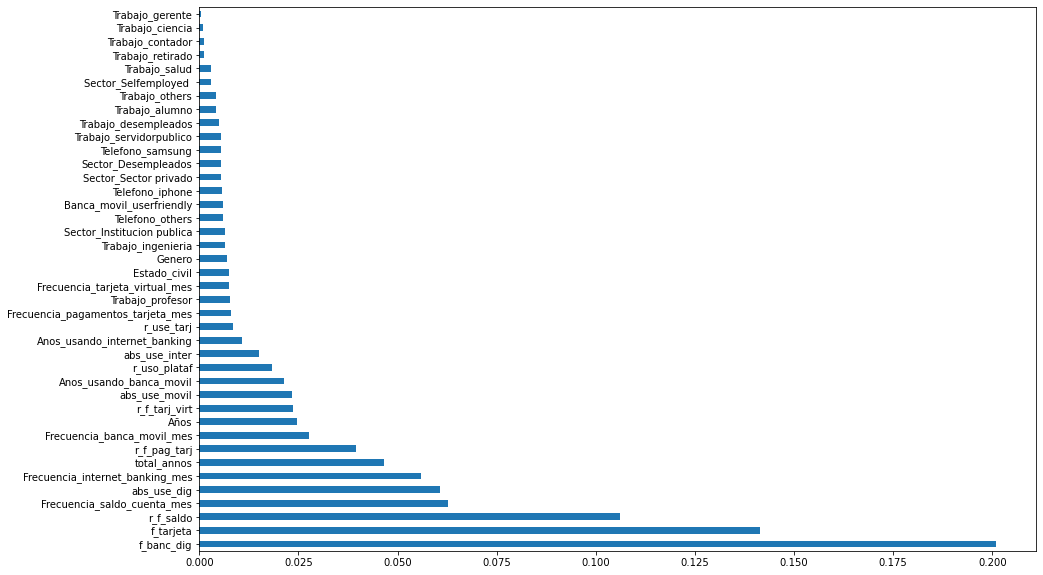

In [109]:
fig, ax = plt.subplots(figsize=(15,10))
feature_importance = pd.Series(classifiers['gbc'].best_estimator_.feature_importances_, index=X_train_whole1.columns.tolist())
feature_importance.nlargest(40).plot(kind='barh',ax=ax)

<AxesSubplot:>

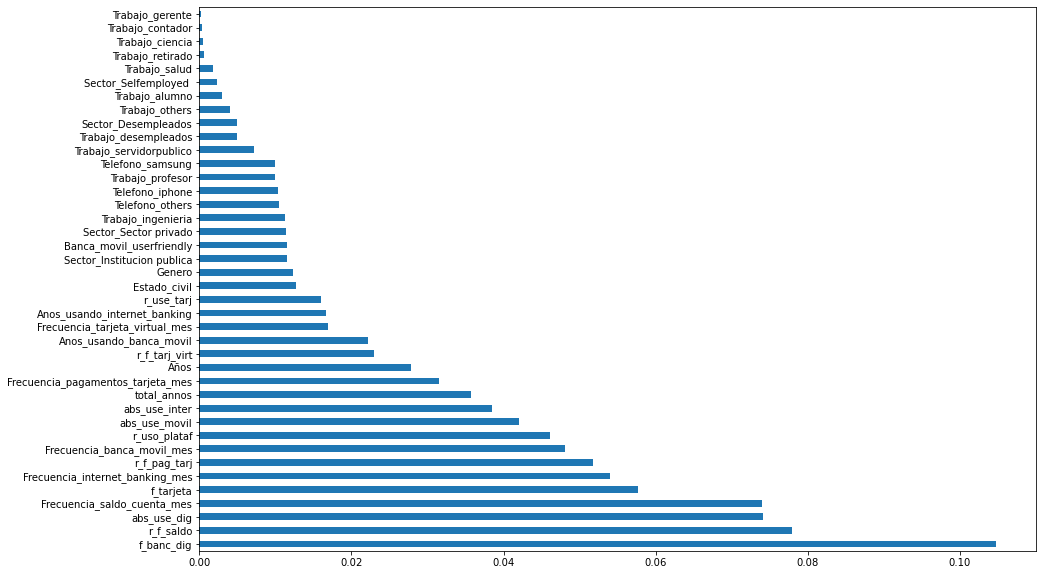

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
feature_importance = pd.Series(classifiers['rfc'].best_estimator_.feature_importances_, index=X_train_whole1.columns.tolist())
feature_importance.nlargest(40).plot(kind='barh',ax=ax)

ingenieria                         7413
profesor                           3534
servidor publico                   3302
nan                                2955
desempleados                       2128
alumno                             1205
adquisitivo                         408
analista de informacion             367
artesano                            353
entrenador                          312
enfermera                           296
cajero                              270
psicologo                           195
retirado                            195
minero                              110
quimico                             110
matematico                          102
business intelligence developer     100
guia turistica                       98
medico                               95
contador                             95
gerente                              93
interprete                           90
trabajador                           89
director                             84


<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [6]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



In [7]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'TARGET'])

In [8]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [10]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
impute_zeros.fit(X=df_training_dataset)

# Reconstruyendo un Pandas DataFrame con los resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
S

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [11]:
df_training_dataset_imputed.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
13234,78,M,35.0,Casado,Ingenieria en computacion,Sector privado,Iphone,5.0,0.0,Si,50.0,30.0,15.0,0.0,0.0,Perfil_2
13235,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
13236,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
13237,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
13238,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [12]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

In [13]:
df_training_dataset_rmcolumns.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
13234,35.0,5.0,0.0,Si,50.0,30.0,15.0,0.0,0.0,Perfil_2
13235,40.0,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
13236,24.0,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
13237,24.0,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
13238,30.0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [14]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
df_training.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,Banca_movil_userfriendly_No,Banca_movil_userfriendly_Si
13234,35.0,5.0,0.0,50.0,30.0,15.0,0.0,0.0,Perfil_2,0,1
13235,40.0,10.0,3.0,31.0,0.0,0.0,0.0,31.0,Perfil_3,0,1
13236,24.0,5.0,3.0,0.0,30.0,1.0,0.0,0.0,Perfil_4,0,1
13237,24.0,5.0,6.0,7.0,0.0,1.0,1.0,0.0,Perfil_4,1,0
13238,30.0,5.0,4.0,31.0,31.0,0.0,0.0,0.0,Perfil_3,1,0


# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [15]:
df_training.columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'],
      dtype='object')

In [16]:
features = df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
]
target = df_training['TARGET']  ## No cambie esta variable

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

### Entrenando un árbol de decisión

In [18]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

### Haciendo predicciones en la muestra de prueba

In [19]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Perfil_4' 'Perfil_2' 'Perfil_4' ... 'Perfil_3' 'Perfil_4' 'Perfil_2']


### Analizando la calidad del modelo a través de la matriz de confusión

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

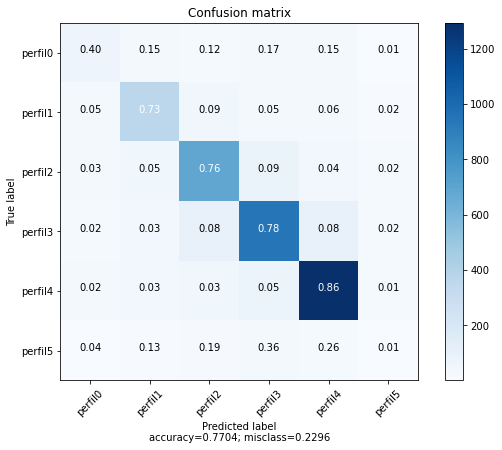

In [21]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [15]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-11 17:51:18--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

to_be_scored.csv        [ <=>                ]  85.58K  --.-KB/s    in 0.01s   

2020-09-11 17:51:18 (6.96 MB/s) - ‘to_be_scored.csv’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [ ]:
df_to_be_scored.info()

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [ ]:
# 1 - Removiendo filas con valores NaN 
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'])

# 2 - Reemplazando con ceros los valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

# 4 - Encoding con "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])

df_to_be_scored_4.tail()

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [ ]:
df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [ ]:
df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
